# PREPARE & LOAD DATA + CLEAN DATA

In [330]:
# Import standard Libraries
import pandas as pd
import seaborn as sns
import altair as alt
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '%.3f' % x) # turn off scientific notation and too much decimal blah
sns.set_style("darkgrid") # Define style for dataviz

sns.set(rc={'figure.figsize':(10,10)})
print("imports ok")

imports ok


In [331]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [332]:
data = pd.read_csv ('/content/gdrive/MyDrive/Module_3_GROUP6FOLDER/S0_STUDIO/09_FINAL_20210617/01_DATASET/DATASET_V7_studioALL.csv')
pd.options.display.max_columns = None

print(data)
print(data.shape)

               City  ConstructionTime  ConstructionCost  Rotation  LengthX  \
0     Ils-de-France                 3             16176         0    3.960   
1     Ils-de-France                 3             18817         0    3.960   
2     Ils-de-France                 4             20817         0    3.960   
3     Ils-de-France                 3             16253         0    5.180   
4     Ils-de-France                 3             18137         0    5.180   
...             ...               ...               ...       ...      ...   
1351  Ils-de-France                 8             37634       290    8.840   
1352  Ils-de-France                10             43440       290    8.840   
1353  Ils-de-France                11             47290       290   10.060   
1354  Ils-de-France                12             49251       290   11.280   
1355  Ils-de-France                 9             41172       290    9.910   

      LengthY  Wall_num  Window_num  sDA  TotalElec  Light  Coo

In [333]:
data.describe()

,ConstructionTime,ConstructionCost,Rotation,LengthX,LengthY,Wall_num,Window_num,sDA,TotalElec,Light,Cooling,Heating,TerraceCost,WindowCost,ExtCost,IntCost,mesh1,mesh2,mesh3,mesh4,mesh5,mesh6,mesh7,mesh8,mesh9,mesh10,mesh11,mesh12,mesh13,mesh14,mesh15,mesh16,mesh17,mesh18,mesh19,mesh20,mesh21,mesh22,mesh23,mesh24,mesh25,mesh26,mesh27,mesh28,mesh29,mesh30,mesh31,mesh32,mesh33,mesh34,mesh35,mesh36,mesh37,mesh38,mesh39,mesh40,mesh41,mesh42,mesh43,mesh44,mesh45,mesh46,mesh47,mesh48,mesh49,mesh50,mesh51,mesh52,mesh53,mesh54,mesh55,mesh56,mesh57,mesh58,mesh59,mesh60,mesh61,mesh62,mesh63,mesh64
count,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1356.000,1355.000,1354.000,1354.000,1354.000,738.000
mean,11.861,49613.431,142.758,9.576,9.232,14.955,13.867,77.468,28561.099,3146.130,2000.855,23458.052,7896.792,12836.202,17575.670,8122.295,54.752,70.324,76.793,76.792,74.208,67.744,60.128,58.646,74.366,73.300,65.883,65.340,68.370,70.410,69.710,71.791,80.221,75.077,64.001,48.220,49.395,63.335,73.142,74.830,80.240,71.122,60.470,47.247,44.471,54.473,61.436,72.566,78.229,69.994,58.121,43.810,40.060,51.387,55.498,76.140,82.535,75.419,60.044,45.544,51.799,64.959,71.383,78.189,77.945,80.057,69.549,61.611,64.280,72.963,67.623,67.278,63.131,79.529,72.343,71.208,71.948,70.092,52.329,38.232
std,7.092,24712.859,85.221,3.359,2.965,4.619,6.223,11.871,16731.719,2297.499,1646.848,13716.175,9253.333,5116.424,8741.812,13499.846,33.256,28.320,22.861,22.727,27.641,24.592,33.431,36.950,21.965,22.532,29.846,26.729,22.500,20.125,23.554,29.841,20.268,20.039,26.492,31.969,27.958,23.151,20.914,21.417,18.151,24.855,28.199,33.504,31.453,29.039,32.299,27.164,20.931,26.331,30.765,35.206,34.226,30.511,34.455,28.529,10.528,20.810,31.266,33.391,29.354,22.670,23.132,21.201,18.560,12.168,24.788,30.323,27.116,14.569,21.897,25.734,31.065,20.545,28.611,32.580,30.261,20.501,33.675,34.049
min,2.000,12331.000,0.000,3.960,3.960,8.000,4.000,0.000,5173.000,498.000,494.000,12.000,0.000,60.000,63.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,7.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,6.000,29789.000,70.000,6.400,7.620,13.000,8.000,75.000,16042.500,1574.000,1129.000,13243.500,0.000,8000.000,12176.000,89.000,25.000,60.000,76.000,76.000,77.000,57.000,28.000,20.000,67.000,68.750,62.000,61.000,68.000,68.000,62.000,79.000,82.000,73.000,59.000,11.000,27.000,60.000,70.000,73.000,77.000,69.000,51.000,0.000,8.000,32.000,32.000,72.000,76.000,67.000,43.000,0.000,0.000,26.000,19.000,86.000,82.000,76.000,39.000,7.000,25.000,59.000,69.000,80.750,75.000,78.000,67.000,59.000,61.000,69.000,55.000,64.000,39.000,80.000,66.000,80.500,78.000,57.000,10.000,4.000
50%,11.000,43440.000,140.000,10.060,8.840,14.000,13.000,80.000,25553.000,2487.000,1789.000,21151.500,0.000,13458.000,13458.000,2563.000,59.500,85.000,88.000,86.000,87.000,77.000,71.000,87.000,85.000,85.000,79.000,75.000,76.000,77.000,80.000,86.000,86.000,81.000,72.000,61.000,54.500,71.000,81.000,81.000,86.000,81.000,70.000,58.500,55.000,67.000,78.000,86.000,87.000,82.000,73.000,57.000,39.000,63.000,74.000,89.000,86.000,81.000,73.000,53.000,

In [334]:
print('number of nans =', data.isnull().sum())

number of nans = City                  0
ConstructionTime      0
ConstructionCost      0
Rotation              0
LengthX               0
                   ... 
mesh60                1
mesh61                2
mesh62                2
mesh63                2
mesh64              618
Length: 81, dtype: int64


In [247]:
#cleaning and setup data

#replace null with mean values per column
data['Rotation'] = data['Rotation'].fillna((data['Rotation'].mean()))
data['LengthX'] = data['LengthX'].fillna((data['LengthX'].mean()))
data['LengthY'] = data['LengthY'].fillna((data['LengthY'].mean()))
data['mesh64'] = data['mesh64'].fillna((data['mesh64'].mean()))
data['mesh63'] = data['mesh63'].fillna((data['mesh63'].mean()))
data['mesh62'] = data['mesh62'].fillna((data['mesh62'].mean()))
data['mesh61'] = data['mesh61'].fillna((data['mesh61'].mean()))
data['mesh60'] = data['mesh60'].fillna((data['mesh60'].mean()))

#convert int64 to float
#data['Area'] = data['Area'].astype(float)
#data['Rotation'] = data['Rotation'].astype(float)
#data['ConstructionTime'] = data['ConstructionTime'].astype(float)
#data['ConstructionCost'] = data['ConstructionCost'].astype(float)

print('number of nans =', data.isnull().sum())

number of nans = City                0
ConstructionTime    0
ConstructionCost    0
Rotation            0
LengthX             0
                   ..
mesh60              0
mesh61              0
mesh62              0
mesh63              0
mesh64              0
Length: 81, dtype: int64


In [335]:
data = data.dropna(how = "any")
data.info()
data.reset_index(inplace=True, drop = True)
data.head()
print('number of nans Recheck after delete Na =', data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738 entries, 0 to 1352
Data columns (total 81 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              738 non-null    object 
 1   ConstructionTime  738 non-null    int64  
 2   ConstructionCost  738 non-null    int64  
 3   Rotation          738 non-null    int64  
 4   LengthX           738 non-null    float64
 5   LengthY           738 non-null    float64
 6   Wall_num          738 non-null    int64  
 7   Window_num        738 non-null    int64  
 8   sDA               738 non-null    int64  
 9   TotalElec         738 non-null    int64  
 10  Light             738 non-null    int64  
 11  Cooling           738 non-null    int64  
 12  Heating           738 non-null    int64  
 13  TerraceCost       738 non-null    int64  
 14  WindowCost        738 non-null    int64  
 15  ExtCost           738 non-null    int64  
 16  IntCost           738 non-null    int64  
 

In [336]:
print("number of duplicates = ", data.duplicated().sum())

data = data.drop_duplicates()
print("number of duplicates = ", data.duplicated().sum())

number of duplicates =  0
number of duplicates =  0


In [337]:
#Check binary value
for colname, col in data.iteritems():
  print(colname, "min_val", col.min(), "max_val", col.max())

City min_val Ils-de-France max_val Ils-de-France
ConstructionTime min_val 2 max_val 27
ConstructionCost min_val 12331 max_val 98824
Rotation min_val 0 max_val 290
LengthX min_val 3.96 max_val 15.2388
LengthY min_val 3.96 max_val 14.94
Wall_num min_val 8 max_val 29
Window_num min_val 4 max_val 24
sDA min_val 0 max_val 97
TotalElec min_val 5173 max_val 71257
Light min_val 498 max_val 10023
Cooling min_val 494 max_val 3648
Heating min_val 4163 max_val 57860
TerraceCost min_val 0 max_val 0
WindowCost min_val 4000 max_val 24000
ExtCost min_val 7690 max_val 27877
IntCost min_val 641 max_val 51908
mesh1 min_val 0 max_val 90
mesh2 min_val 0 max_val 91
mesh3 min_val 0 max_val 92
mesh4 min_val 0 max_val 92
mesh5 min_val 0 max_val 92
mesh6 min_val 0 max_val 91
mesh7 min_val 0 max_val 91
mesh8 min_val 0 max_val 93
mesh9 min_val 0 max_val 91
mesh10 min_val 0 max_val 89
mesh11 min_val 5 max_val 90
mesh12 min_val 0 max_val 91
mesh13 min_val 0 max_val 90
mesh14 min_val 0 max_val 89
mesh15 min_val 0 ma

In [338]:
data

,City,ConstructionTime,ConstructionCost,Rotation,LengthX,LengthY,Wall_num,Window_num,sDA,TotalElec,Light,Cooling,Heating,TerraceCost,WindowCost,ExtCost,IntCost,mesh1,mesh2,mesh3,mesh4,mesh5,mesh6,mesh7,mesh8,mesh9,mesh10,mesh11,mesh12,mesh13,mesh14,mesh15,mesh16,mesh17,mesh18,mesh19,mesh20,mesh21,mesh22,mesh23,mesh24,mesh25,mesh26,mesh27,mesh28,mesh29,mesh30,mesh31,mesh32,mesh33,mesh34,mesh35,mesh36,mesh37,mesh38,mesh39,mesh40,mesh41,mesh42,mesh43,mesh44,mesh45,mesh46,mesh47,mesh48,mesh49,mesh50,mesh51,mesh52,mesh53,mesh54,mesh55,mesh56,mesh57,mesh58,mesh59,mesh60,mesh61,mesh62,mesh63,mesh64
0,Ils-de-France,3,16176,0,3.960,5.180,10,4,89,7202,656,552,5994,0,4000,9613,2563,25,58,60,49,7,73,90,88,56,74,72,67,59,81,86,85,83,84,81,73,79,78,81,79,90,87,84,83,84,83,86,90,90,87,86,85,84,84,86,90,87,87,87,86,84,82,83,81,73,85,88,88,84,78,73,41,33,75,90,90.000,75.000,61.000,45.000,2.000
1,Ils-de-France,3,18817,0,3.960,6.400,10,6,88,8969,811,747,7411,0,6000,9613,3204,86,85,79,9,14,25,88,89,90,87,82,28,48,61,85,86,91,88,85,71,37,63,80,80,91,88,86,84,83,83,86,90,90,88,86,85,85,85,87,90,87,87,87,86,86,87,86,85,75,87,89,86,86,88,86,71,24,83,91,80.000,81.000,91.000,80.000,14.000
2,Ils-de-France,4,20817,0,3.960,7.620,10,8,92,10396,959,999,8437,0,8000,9613,3204,27,76,87,90,91,91,90,87,84,87,88,88,88,87,86,85,91,90,89,88,87,85,83,80,91,91,89,88,86,83,80,73,91,91,89,87,86,81,73,52,91,90,89,87,85,44,46,18,83,86,87,87,86,77,82,81,12,72,86,89.000,89.000,80.000,86.000,89.000
3,Ils-de-France,3,16253,0,5.180,3.960,8,6,95,7673,656,681,6337,0,6000,7690,2563,46,79,91,91,91,89,73,21,74,86,89,90,90,88,84,70,86,88,89,89,89,87,86,84,91,89,88,88,87,86,88,90,91,89,88,88,85,85,87,91,85,87,88,87,82,75,82,87,70,85,88,89,72,79,84,90,27,75,90,90.000,76.000,78.000,82.000,85.000
4,Ils-de-France,3,18137,0,5.180,5.180,11,5,77,8712,864,630,7218,0,5000,10574,2563,1,0,1,9,31,0,90,87,6,32,46,40,33,18,85,84,29,68,71,65,60,47,79,79,75,82,81,80,78,72,67,63,90,87,85,85,85,86,87,90,90,88,87,87,87,87,87,90,83,86,88,89,89,88,85,75,50,78,89,91.000,91.000,89.000,75.000,34.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,Ils-de-France,7,35031,290,8.840,6.400,13,11,77,19445,1797,1365,16282,0,11000,12496,11535,89,81,63,85,86,87,18,4,87,85,75,80,79,82,68,18,90,86,80,59,52,73,75,71,91,87,82,0,0,70,79,87,91,88,84,69,48,64,78,87,91,88,86,79,70,65,25,24,86,88,88,19,0,79,35,3,62,89,91,87.000,0.000,85.000,0.000,0.000
734,Ils-de-France,5,25303,290,5.180,7.620,12,8,72,12820,1254,968,10598,0,8000,11535,5768,58,89,91,91,90,62,5,1,82,88,90,89,83,75,21,4,89,88,88,86,70,66,25,3,91,89,87,85,64,41,4,6,91,89,87,85,65,12,2,25,89,88,88,86,49,52,6,1,81,88,89,88,16,57,79,88,45,87,91,90.000,34.000,52.000,77.000,86.000
735,Ils-de-France,7,34993,290,8.840,6.400,14,10,86,19139,1851,1435,15853,0,10000,13458,11535,55,90,91,87,87,86,16,0,85,88,88,81,82,81,61,13,90,87,86,6,70,68,69,61,91,87,83,77,50,64,69,85,88,85,80,73,31,50,67,85,82,83,77,0,67,72,69,67,84,82,71,79,80,82,64,28,89,80,54,85.000,86.000,87.000,32.000,6.000
736,Ils-de-France,8,37634,290,8.840,7.620,14,12,84,22137,2369,1671,18098,0,12000,13458,12176,64,90,91,86,87,85,33,0,87,88,88,77,80,78,67,30,91,87,85,13,61,67,73,79,90,86,82,74,41,64,77,89,80,82,78,71,15,55,76,88,77,80,75,0,56,70,76,81,88,85,75,75,75,80,70,44,92,86,71,85.000,86.000,87.000,48.000,6.000


In [339]:
#Filter data select by columns name
#data = data.filter (items = ["ConstructionTime", "ConstructionCost", "Rotation" , "LengthX", "LengthY", "Wall_num", "Window_num", "sDA", "TotalElec", "Light", "Cooling", "Heating", "TerraceCost",  "WindowCost","ExtCost","IntCost"])
dataPCA = data[["ConstructionTime", "ConstructionCost", "Rotation",  "LengthX", "LengthY", "Wall_num", "Window_num", "sDA", "TotalElec", "Light", "Cooling", "Heating", "TerraceCost",  "WindowCost","ExtCost","IntCost"]]

dataPCA.describe()
#Reorder : data2 = data[["ConstructionCost", "Rotation", "ConstructionTime", "Area", "LengthX", "LengthY","W1", "W2", "W3", "W4", "Wall_num", "Window_num", "sDA", "TotalElec", "Light", "Cooling", "Heating"]]

,ConstructionTime,ConstructionCost,Rotation,LengthX,LengthY,Wall_num,Window_num,sDA,TotalElec,Light,Cooling,Heating,TerraceCost,WindowCost,ExtCost,IntCost
count,738.000,738.000,738.000,738.000,738.000,738.000,738.000,738.000,738.000,738.000,738.000,738.000,738.000,738.000,738.000,738.000
mean,9.023,39516.386,143.401,7.979,8.076,14.260,10.934,78.317,23728.045,2631.394,1574.766,19521.874,0.000,10933.604,13707.878,14874.904
std,7.397,24990.404,85.645,3.696,2.877,5.515,5.708,13.721,18804.980,2552.703,931.181,15397.602,0.000,5708.399,5301.295,15325.759
min,2.000,12331.000,0.000,3.960,3.960,8.000,4.000,0.000,5173.000,498.000,494.000,4163.000,0.000,4000.000,7690.000,641.000
25%,4.000,23303.000,70.000,5.180,6.400,11.000,7.000,75.000,11111.250,1079.000,884.750,9121.500,0.000,7000.000,10574.000,5768.000
50%,6.000,30789.000,140.000,6.402,7.620,13.000,9.000,81.000,16170.500,1603.000,1184.500,13493.000,0.000,9000.000,12496.000,8331.000
75%,10.000,43440.000,220.000,8.840,8.840,14.000,13.000,86.000,25718.750,2487.000,1848.000,21474.500,0.000,13000.000,13458.000,16021.000
max,27.000,98824.000,290.000,15.239,14.940,29.000,24.000,97.000,71257.000,10023.000,3648.000,57860.000,0.000,24000.000,27877.000,51908.000


In [340]:
data

,City,ConstructionTime,ConstructionCost,Rotation,LengthX,LengthY,Wall_num,Window_num,sDA,TotalElec,Light,Cooling,Heating,TerraceCost,WindowCost,ExtCost,IntCost,mesh1,mesh2,mesh3,mesh4,mesh5,mesh6,mesh7,mesh8,mesh9,mesh10,mesh11,mesh12,mesh13,mesh14,mesh15,mesh16,mesh17,mesh18,mesh19,mesh20,mesh21,mesh22,mesh23,mesh24,mesh25,mesh26,mesh27,mesh28,mesh29,mesh30,mesh31,mesh32,mesh33,mesh34,mesh35,mesh36,mesh37,mesh38,mesh39,mesh40,mesh41,mesh42,mesh43,mesh44,mesh45,mesh46,mesh47,mesh48,mesh49,mesh50,mesh51,mesh52,mesh53,mesh54,mesh55,mesh56,mesh57,mesh58,mesh59,mesh60,mesh61,mesh62,mesh63,mesh64
0,Ils-de-France,3,16176,0,3.960,5.180,10,4,89,7202,656,552,5994,0,4000,9613,2563,25,58,60,49,7,73,90,88,56,74,72,67,59,81,86,85,83,84,81,73,79,78,81,79,90,87,84,83,84,83,86,90,90,87,86,85,84,84,86,90,87,87,87,86,84,82,83,81,73,85,88,88,84,78,73,41,33,75,90,90.000,75.000,61.000,45.000,2.000
1,Ils-de-France,3,18817,0,3.960,6.400,10,6,88,8969,811,747,7411,0,6000,9613,3204,86,85,79,9,14,25,88,89,90,87,82,28,48,61,85,86,91,88,85,71,37,63,80,80,91,88,86,84,83,83,86,90,90,88,86,85,85,85,87,90,87,87,87,86,86,87,86,85,75,87,89,86,86,88,86,71,24,83,91,80.000,81.000,91.000,80.000,14.000
2,Ils-de-France,4,20817,0,3.960,7.620,10,8,92,10396,959,999,8437,0,8000,9613,3204,27,76,87,90,91,91,90,87,84,87,88,88,88,87,86,85,91,90,89,88,87,85,83,80,91,91,89,88,86,83,80,73,91,91,89,87,86,81,73,52,91,90,89,87,85,44,46,18,83,86,87,87,86,77,82,81,12,72,86,89.000,89.000,80.000,86.000,89.000
3,Ils-de-France,3,16253,0,5.180,3.960,8,6,95,7673,656,681,6337,0,6000,7690,2563,46,79,91,91,91,89,73,21,74,86,89,90,90,88,84,70,86,88,89,89,89,87,86,84,91,89,88,88,87,86,88,90,91,89,88,88,85,85,87,91,85,87,88,87,82,75,82,87,70,85,88,89,72,79,84,90,27,75,90,90.000,76.000,78.000,82.000,85.000
4,Ils-de-France,3,18137,0,5.180,5.180,11,5,77,8712,864,630,7218,0,5000,10574,2563,1,0,1,9,31,0,90,87,6,32,46,40,33,18,85,84,29,68,71,65,60,47,79,79,75,82,81,80,78,72,67,63,90,87,85,85,85,86,87,90,90,88,87,87,87,87,87,90,83,86,88,89,89,88,85,75,50,78,89,91.000,91.000,89.000,75.000,34.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,Ils-de-France,7,35031,290,8.840,6.400,13,11,77,19445,1797,1365,16282,0,11000,12496,11535,89,81,63,85,86,87,18,4,87,85,75,80,79,82,68,18,90,86,80,59,52,73,75,71,91,87,82,0,0,70,79,87,91,88,84,69,48,64,78,87,91,88,86,79,70,65,25,24,86,88,88,19,0,79,35,3,62,89,91,87.000,0.000,85.000,0.000,0.000
734,Ils-de-France,5,25303,290,5.180,7.620,12,8,72,12820,1254,968,10598,0,8000,11535,5768,58,89,91,91,90,62,5,1,82,88,90,89,83,75,21,4,89,88,88,86,70,66,25,3,91,89,87,85,64,41,4,6,91,89,87,85,65,12,2,25,89,88,88,86,49,52,6,1,81,88,89,88,16,57,79,88,45,87,91,90.000,34.000,52.000,77.000,86.000
735,Ils-de-France,7,34993,290,8.840,6.400,14,10,86,19139,1851,1435,15853,0,10000,13458,11535,55,90,91,87,87,86,16,0,85,88,88,81,82,81,61,13,90,87,86,6,70,68,69,61,91,87,83,77,50,64,69,85,88,85,80,73,31,50,67,85,82,83,77,0,67,72,69,67,84,82,71,79,80,82,64,28,89,80,54,85.000,86.000,87.000,32.000,6.000
736,Ils-de-France,8,37634,290,8.840,7.620,14,12,84,22137,2369,1671,18098,0,12000,13458,12176,64,90,91,86,87,85,33,0,87,88,88,77,80,78,67,30,91,87,85,13,61,67,73,79,90,86,82,74,41,64,77,89,80,82,78,71,15,55,76,88,77,80,75,0,56,70,76,81,88,85,75,75,75,80,70,44,92,86,71,85.000,86.000,87.000,48.000,6.000


# PLOT DATA

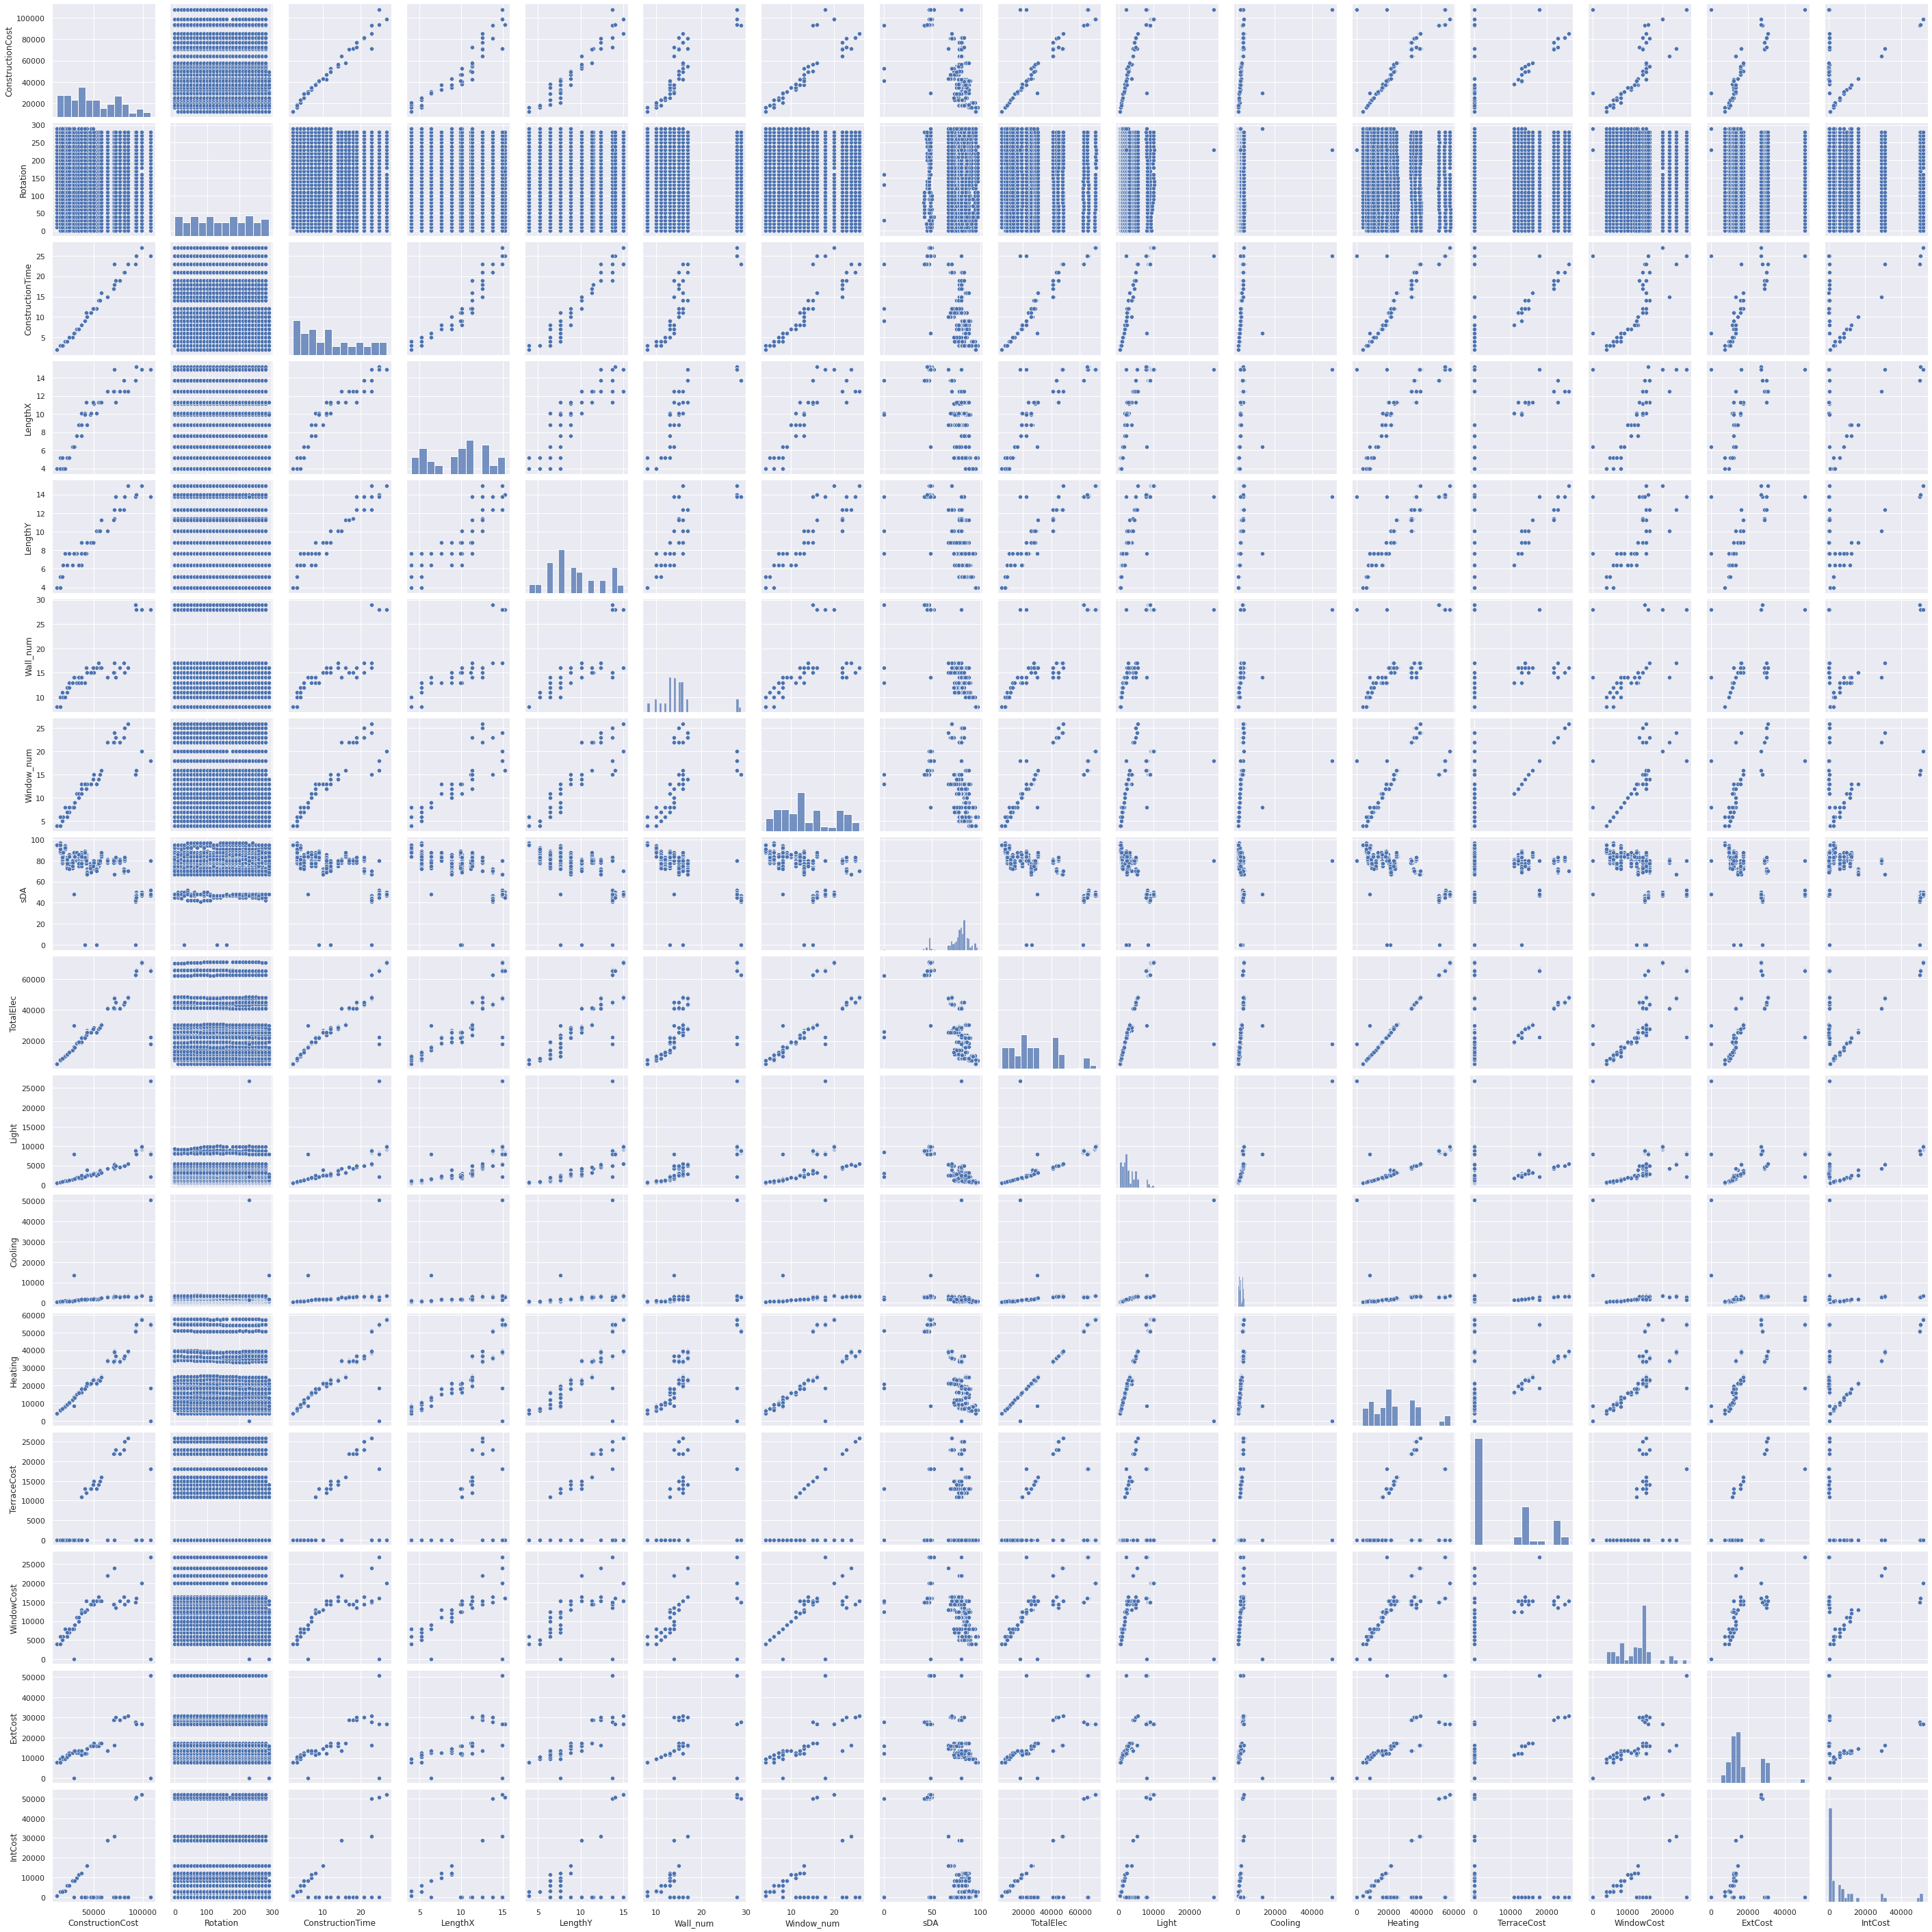

In [32]:
#["Area", "ConstructionTime", "ConstructionCost", "Electricity","sDA"]
sns.pairplot(dataPCA)

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1356 entries, 0 to 1355
Data columns (total 80 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ConstructionTime  1356 non-null   int64  
 1   ConstructionCost  1356 non-null   int64  
 2   Rotation          1356 non-null   int64  
 3   LengthX           1356 non-null   float64
 4   LengthY           1356 non-null   float64
 5   Wall_num          1356 non-null   int64  
 6   Window_num        1356 non-null   int64  
 7   sDA               1356 non-null   int64  
 8   TotalElec         1356 non-null   int64  
 9   Light             1356 non-null   int64  
 10  Cooling           1356 non-null   int64  
 11  Heating           1356 non-null   int64  
 12  TerraceCost       1356 non-null   int64  
 13  WindowCost        1356 non-null   int64  
 14  ExtCost           1356 non-null   int64  
 15  IntCost           1356 non-null   int64  
 16  mesh1             1356 non-null   int64  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f82b5cf4d10>]],
      dtype=object)

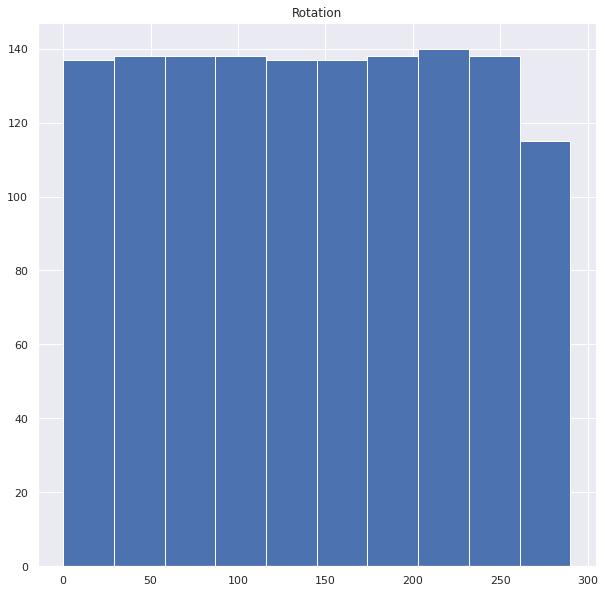

In [39]:
data.hist("Rotation")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f82b5c951d0>]],
      dtype=object)

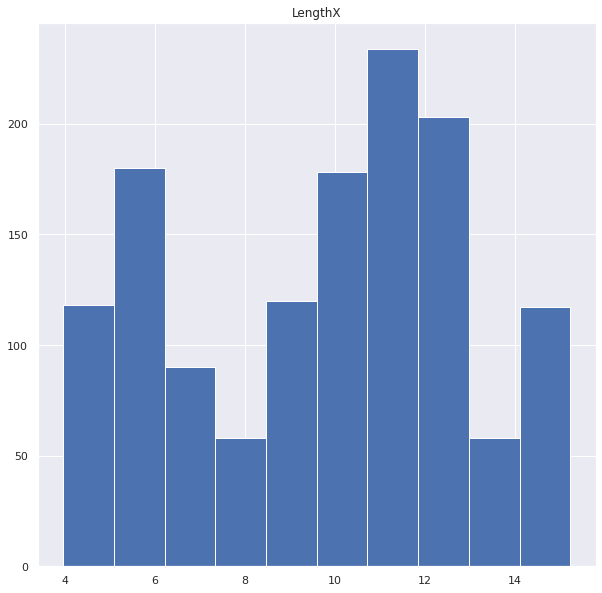

In [40]:
data.hist("LengthX")

'ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, \n                 cmap="bone", vmin=-1, vmax=1, annot=True)'

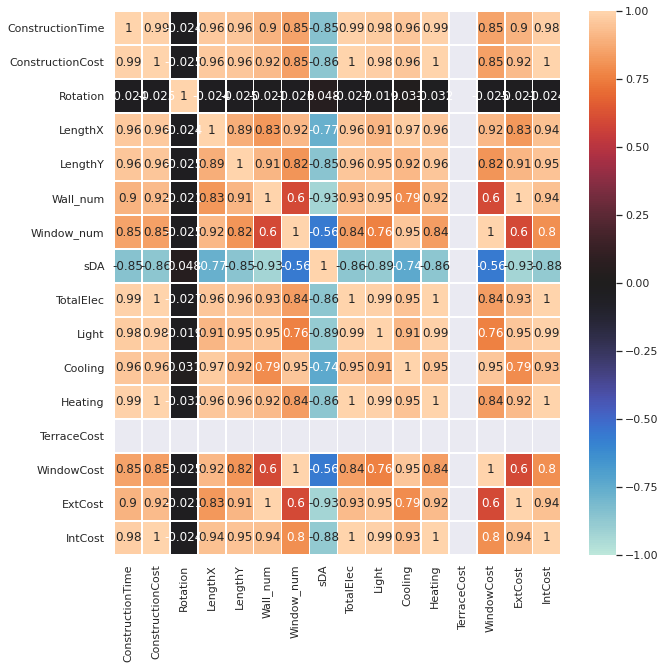

In [341]:
#sns.heatmap(data.corr())
sns.heatmap(dataPCA.corr(), center=0, linewidths=0.5,  vmin=-1, vmax=1,annot=True)
"""ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, 
                 cmap="bone", vmin=-1, vmax=1, annot=True)"""

Windows, WallPanels relate with Construction Cost & Time
sDA-Windonw

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


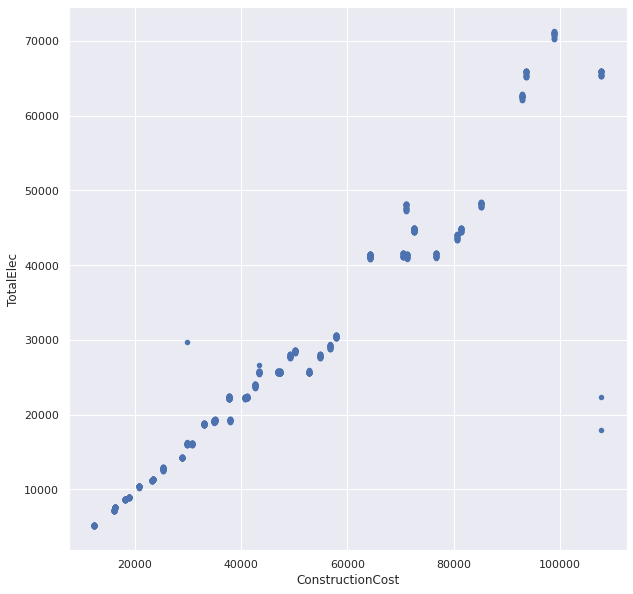

In [43]:
data.plot.scatter("ConstructionCost", "TotalElec")

# PCA -ALL

In [342]:
dataPCA

,ConstructionTime,ConstructionCost,Rotation,LengthX,LengthY,Wall_num,Window_num,sDA,TotalElec,Light,Cooling,Heating,TerraceCost,WindowCost,ExtCost,IntCost
0,3,16176,0,3.960,5.180,10,4,89,7202,656,552,5994,0,4000,9613,2563
1,3,18817,0,3.960,6.400,10,6,88,8969,811,747,7411,0,6000,9613,3204
2,4,20817,0,3.960,7.620,10,8,92,10396,959,999,8437,0,8000,9613,3204
3,3,16253,0,5.180,3.960,8,6,95,7673,656,681,6337,0,6000,7690,2563
4,3,18137,0,5.180,5.180,11,5,77,8712,864,630,7218,0,5000,10574,2563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,7,35031,290,8.840,6.400,13,11,77,19445,1797,1365,16282,0,11000,12496,11535
734,5,25303,290,5.180,7.620,12,8,72,12820,1254,968,10598,0,8000,11535,5768
735,7,34993,290,8.840,6.400,14,10,86,19139,1851,1435,15853,0,10000,13458,11535
736,8,37634,290,8.840,7.620,14,12,84,22137,2369,1671,18098,0,12000,13458,12176


In [343]:
dataPCA

,ConstructionTime,ConstructionCost,Rotation,LengthX,LengthY,Wall_num,Window_num,sDA,TotalElec,Light,Cooling,Heating,TerraceCost,WindowCost,ExtCost,IntCost
0,3,16176,0,3.960,5.180,10,4,89,7202,656,552,5994,0,4000,9613,2563
1,3,18817,0,3.960,6.400,10,6,88,8969,811,747,7411,0,6000,9613,3204
2,4,20817,0,3.960,7.620,10,8,92,10396,959,999,8437,0,8000,9613,3204
3,3,16253,0,5.180,3.960,8,6,95,7673,656,681,6337,0,6000,7690,2563
4,3,18137,0,5.180,5.180,11,5,77,8712,864,630,7218,0,5000,10574,2563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,7,35031,290,8.840,6.400,13,11,77,19445,1797,1365,16282,0,11000,12496,11535
734,5,25303,290,5.180,7.620,12,8,72,12820,1254,968,10598,0,8000,11535,5768
735,7,34993,290,8.840,6.400,14,10,86,19139,1851,1435,15853,0,10000,13458,11535
736,8,37634,290,8.840,7.620,14,12,84,22137,2369,1671,18098,0,12000,13458,12176


In [344]:
from sklearn.preprocessing import StandardScaler

In [345]:
# Let's standard-scale our data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dataPCA)
#OR scaler.fit(dataPCA)
#scaled_data = scaler.transform(dataPCA)

In [346]:
# What are mean and Sd now?
pd.DataFrame(data_scaled, columns=dataPCA.columns).describe()

,ConstructionTime,ConstructionCost,Rotation,LengthX,LengthY,Wall_num,Window_num,sDA,TotalElec,Light,Cooling,Heating,TerraceCost,WindowCost,ExtCost,IntCost
count,738.000,738.000,738.000,738.000,738.000,738.000,738.000,738.000,738.000,738.000,738.000,738.000,738.000,738.000,738.000,738.000
mean,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,0.000,1.001,1.001,1.001
min,-0.950,-1.089,-1.675,-1.088,-1.432,-1.136,-1.215,-5.712,-0.987,-0.836,-1.161,-0.998,0.000,-1.215,-1.136,-0.929
25%,-0.680,-0.649,-0.858,-0.758,-0.583,-0.592,-0.690,-0.242,-0.671,-0.609,-0.742,-0.676,0.000,-0.690,-0.592,-0.595
50%,-0.409,-0.349,-0.040,-0.427,-0.159,-0.229,-0.339,0.196,-0.402,-0.403,-0.419,-0.392,0.000,-0.339,-0.229,-0.427
75%,0.132,0.157,0.895,0.233,0.266,-0.047,0.362,0.560,0.106,-0.057,0.294,0.127,0.000,0.362,-0.047,0.075
max,2.432,2.375,1.713,1.966,2.387,2.675,2.291,1.363,2.529,2.898,2.228,2.492,0.000,2.291,2.675,2.418


Executing PCA


In [347]:
"""
model = PCA(n_components=2) #How much do you wnat  for components, if you want to reduce
"""

'\nmodel = PCA(n_components=2) #How much do you wnat  for components, if you want to reduce\n'

In [348]:
# Instantiate a PCA object
from sklearn.decomposition import PCA # PCA from  sklearn, the python ML standard library
model = PCA() # Number of components needs to be defined. We just for illustration take about half of the numbers of features

In [349]:
# Fit the model
model.fit(data_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [350]:
# Fit and transform the data
data_reduced = model.transform(data_scaled)
print(data_scaled.shape)
print(data_reduced.shape)

(738, 16)
(738, 16)


##PCA visualization


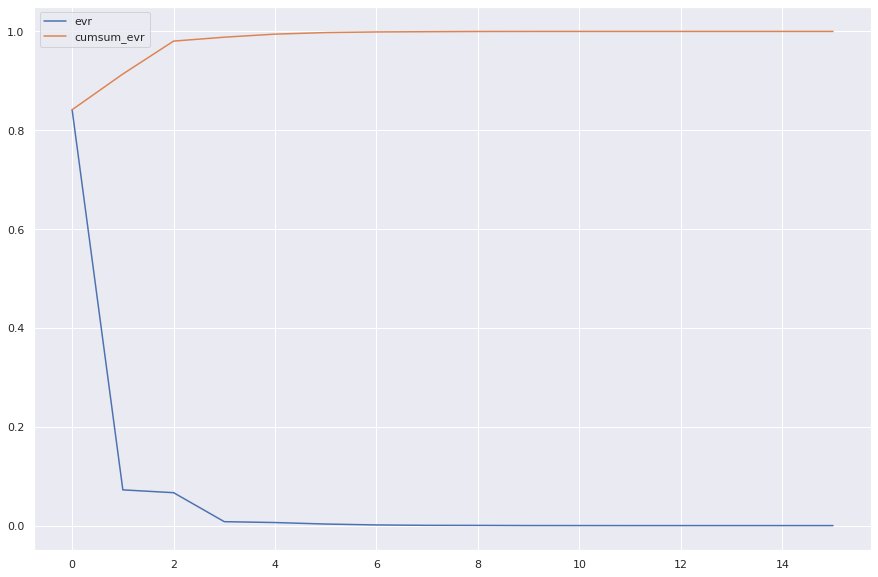

In [352]:
plot_data = pd.DataFrame({'evr': model.explained_variance_ratio_, 'cumsum_evr': np.cumsum(model.explained_variance_ratio_)}).stack()
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(y = plot_data.values, x = plot_data.index.get_level_values(0), hue=plot_data.index.get_level_values(1))

In [353]:
print(model.explained_variance_ratio_)

[8.41520264e-01 7.22798994e-02 6.65884702e-02 7.92362564e-03
 6.17208878e-03 3.13715022e-03 1.28876326e-03 5.44600987e-04
 4.06087170e-04 9.27572836e-05 4.62928183e-05 8.19536482e-11
 3.82299662e-11 2.93277885e-32 1.01528016e-34 2.89868162e-47]


Plotting PCS


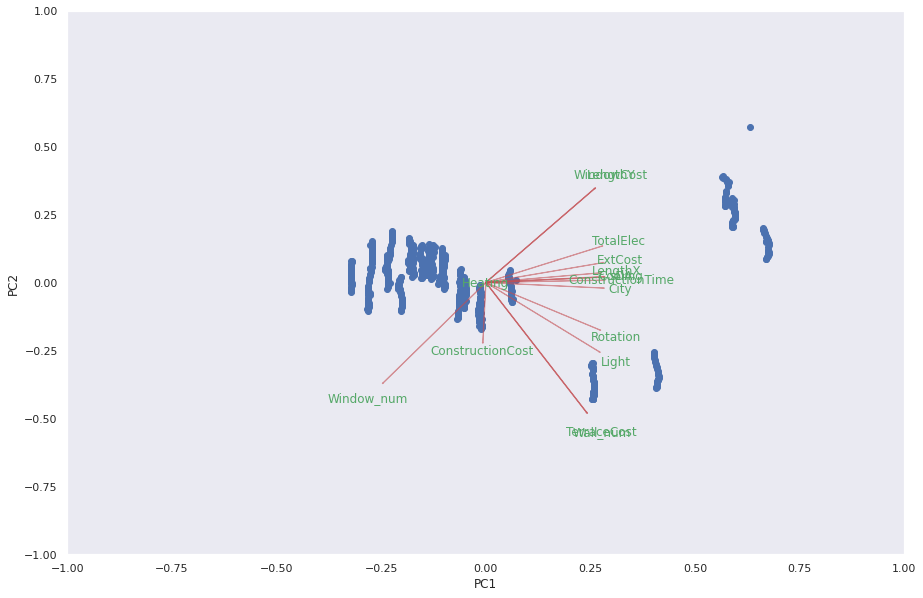

In [355]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, data.columns[i], color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(data_reduced[:,0:2],np.transpose(model.components_[0:2, :]))
plt.show()

In [54]:
pcscores = pd.DataFrame(data_reduced)
loadings = pd.DataFrame(model.components_, columns=dataPCA.columns)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

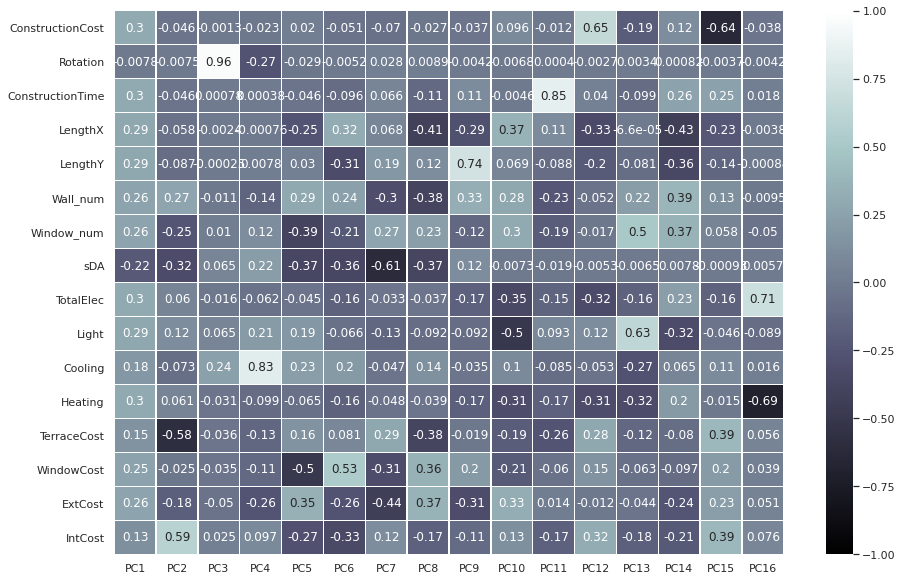

In [55]:
ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, 
                 cmap="bone", vmin=-1, vmax=1, annot=True)

In [56]:
# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = data.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

print(df)

       0                 1
0    PC0  ConstructionCost
1    PC1           IntCost
2    PC2          Rotation
3    PC3           Cooling
4    PC4        WindowCost
5    PC5        WindowCost
6    PC6               sDA
7    PC7           LengthX
8    PC8           LengthY
9    PC9             Light
10  PC10  ConstructionTime
11  PC11  ConstructionCost
12  PC12             Light
13  PC13           LengthX
14  PC14  ConstructionCost
15  PC15         TotalElec


In [57]:
model.components_

array([[ 3.02819297e-01, -7.78419179e-03,  3.00954852e-01,
         2.86443337e-01,  2.88765338e-01,  2.58293041e-01,
         2.60224832e-01, -2.24581254e-01,  3.00194334e-01,
         2.87941143e-01,  1.80051635e-01,  2.99090825e-01,
         1.53263587e-01,  2.54388242e-01,  2.58666478e-01,
         1.31718445e-01],
       [-4.57272865e-02, -7.52876586e-03, -4.61266224e-02,
        -5.79815076e-02, -8.65312686e-02,  2.68743799e-01,
        -2.49454362e-01, -3.18997408e-01,  5.95799734e-02,
         1.20917083e-01, -7.32246549e-02,  6.06083774e-02,
        -5.79746637e-01, -2.52189202e-02, -1.82925548e-01,
         5.92667904e-01],
       [-1.27856311e-03,  9.63225094e-01,  7.75372159e-04,
        -2.40476658e-03, -2.46388722e-04, -1.05693834e-02,
         9.96297924e-03,  6.52176690e-02, -1.63932454e-02,
         6.49769251e-02,  2.37988294e-01, -3.13029625e-02,
        -3.64381757e-02, -3.50317066e-02, -4.95674568e-02,
         2.45781349e-02],
       [-2.27855269e-02, -2.65064662e

"\npcscores = pd.DataFrame(data_reduced)\nloadings = pd.DataFrame(model.components_, columns=dataPCA.columns)\nloadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]"

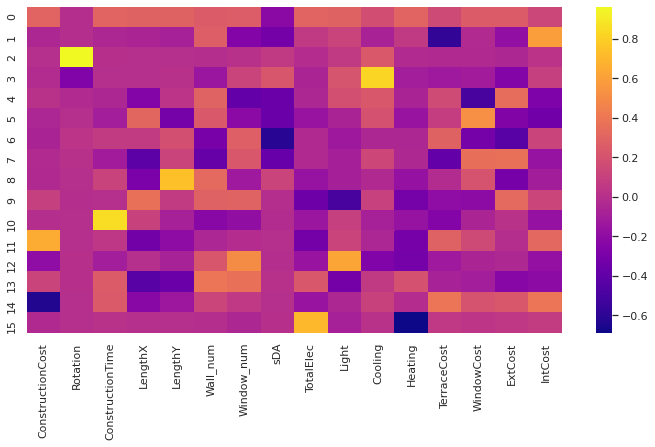

In [58]:
df_comp = pd.DataFrame(model.components_, columns=dataPCA.columns)
plt.figure(figsize=(12, 6))
sns.heatmap(df_comp, cmap = 'plasma',)
"""
pcscores = pd.DataFrame(data_reduced)
loadings = pd.DataFrame(model.components_, columns=dataPCA.columns)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]"""

This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself. To get a better result

# PCA - COST

In [ ]:
dataPCA

,ConstructionCost,Rotation,ConstructionTime,Area,LengthX,LengthY,Wall_num,Window_num,sDA,TotalElec,Light,Cooling,Heating,W1,W2,W3,W4
0,6768.000,0.000,1.000,9.000,2.440,3.660,9.000,1.000,33.000,3156.000,290.000,112.000,2754.000,1.000,0.900,1.000,0.772
1,8049.000,0.000,1.000,12.000,2.440,4.880,11.000,1.000,31.000,4015.000,577.000,219.000,3218.000,1.000,0.800,1.000,0.985
2,11486.000,0.000,2.000,15.000,2.440,6.100,7.000,7.000,100.000,6075.000,469.000,792.000,4814.000,0.300,0.900,0.700,0.198
3,12613.000,0.000,3.000,21.000,2.440,8.540,15.000,3.000,46.000,6553.000,676.000,453.000,5424.000,0.800,0.900,0.700,0.625
4,13535.000,0.000,3.000,24.000,2.440,9.760,18.000,2.000,31.000,7104.000,773.000,334.000,5998.000,0.900,1.000,0.600,0.839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2662,45944.000,330.000,35.000,286.000,19.520,14.640,28.000,28.000,57.000,60373.000,12493.000,4999.000,42881.000,0.300,0.300,0.300,0.787
2663,49739.000,330.000,38.000,310.000,19.520,15.860,23.000,35.000,56.000,66197.000,13389.000,4876.000,47932.000,0.600,0.300,0.500,0.000
2664,49225.000,330.000,41.000,333.000,19.520,17.080,30.000,30.000,51.000,70625.000,15200.000,4879.000,50546.000,0.600,0.400,0.700,0.214
2665,50507.000,330.000,44.000,357.000,19.520,18.300,32.000,30.000,50.000,74964.000,16568.000,5406.000,52991.000,0.400,0.600,0.500,0.427


In [ ]:
# Transfer the (categorical) outcome of interest to the index (PCA only works with numerical data)
dataPCA.set_index('ConstructionCost', inplace=True)

In [ ]:
dataPCA

,Rotation,ConstructionTime,Area,LengthX,LengthY,Wall_num,Window_num,sDA,TotalElec,Light,Cooling,Heating,W1,W2,W3,W4
ConstructionCost,,,,,,,,,,,,,,,,
6768.000,0.000,1.000,9.000,2.440,3.660,9.000,1.000,33.000,3156.000,290.000,112.000,2754.000,1.000,0.900,1.000,0.772
8049.000,0.000,1.000,12.000,2.440,4.880,11.000,1.000,31.000,4015.000,577.000,219.000,3218.000,1.000,0.800,1.000,0.985
11486.000,0.000,2.000,15.000,2.440,6.100,7.000,7.000,100.000,6075.000,469.000,792.000,4814.000,0.300,0.900,0.700,0.198
12613.000,0.000,3.000,21.000,2.440,8.540,15.000,3.000,46.000,6553.000,676.000,453.000,5424.000,0.800,0.900,0.700,0.625
13535.000,0.000,3.000,24.000,2.440,9.760,18.000,2.000,31.000,7104.000,773.000,334.000,5998.000,0.900,1.000,0.600,0.839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45944.000,330.000,35.000,286.000,19.520,14.640,28.000,28.000,57.000,60373.000,12493.000,4999.000,42881.000,0.300,0.300,0.300,0.787
49739.000,330.000,38.000,310.000,19.520,15.860,23.000,35.000,56.000,66197.000,13389.000,4876.000,47932.000,0.600,0.300,0.500,0.000
49225.000,330.000,41.000,333.000,19.520,17.080,30.000,30.000,51.000,70625.000,15200.000,4879.000,50546.000,0.600,0.400,0.700,0.214


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Let's standard-scale our data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dataPCA)
#OR scaler.fit(dataPCA)
#scaled_data = scaler.transform(dataPCA)

In [ ]:
# What are mean and Sd now?
pd.DataFrame(data_scaled, columns=dataPCA.columns).describe()

,Rotation,ConstructionTime,Area,LengthX,LengthY,Wall_num,Window_num,sDA,TotalElec,Light,Cooling,Heating,W1,W2,W3,W4
count,2667.000,2667.000,2667.000,2667.000,2667.000,2667.000,2667.000,2667.000,2667.000,2667.000,2667.000,2667.000,2667.000,2667.000,2667.000,2667.000
mean,0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.593,-1.309,-1.335,-1.635,-1.627,-2.164,-2.376,-4.145,-1.534,-1.175,-2.016,-1.592,-2.494,-2.596,-2.458,-1.730
25%,-0.868,-0.837,-0.836,-0.937,-0.932,-0.682,-0.657,-0.729,-0.782,-0.786,-0.646,-0.789,-0.580,-0.592,-0.574,-0.869
50%,-0.143,-0.271,-0.279,-0.006,-0.006,-0.065,0.060,0.526,-0.237,-0.319,-0.079,-0.212,-0.102,-0.090,-0.103,0.004
75%,0.727,0.579,0.615,0.925,0.920,0.676,0.633,0.828,0.610,0.462,0.568,0.640,0.376,0.411,0.367,0.867
max,1.597,3.035,3.018,1.623,1.614,3.268,3.642,0.878,3.049,3.430,3.277,2.959,2.290,2.416,2.251,1.730


Executing PCA


In [ ]:
"""
model = PCA(n_components=2) #How much do you wnat  for components, if you want to reduce
"""

'\nmodel = PCA(n_components=2) #How much do you wnat  for components, if you want to reduce\n'

In [ ]:
# Instantiate a PCA object
from sklearn.decomposition import PCA # PCA from  sklearn, the python ML standard library
model = PCA() # Number of components needs to be defined. We just for illustration take about half of the numbers of features

In [ ]:
# Fit the model
model.fit(data_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
# Fit and transform the data
data_reduced = model.transform(data_scaled)
print(data_scaled.shape)
print(data_reduced.shape)

(2667, 16)
(2667, 16)


##PCA visualization


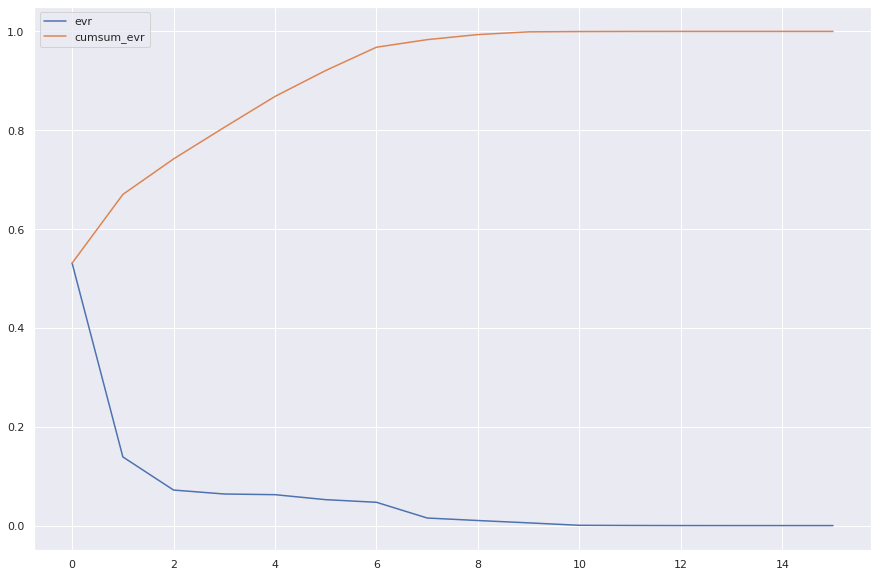

In [ ]:
plot_data = pd.DataFrame({'evr': model.explained_variance_ratio_, 'cumsum_evr': np.cumsum(model.explained_variance_ratio_)}).stack()
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(y = plot_data.values, x = plot_data.index.get_level_values(0), hue=plot_data.index.get_level_values(1))

In [ ]:
print(model.explained_variance_ratio_)

[5.31096933e-01 1.38965291e-01 7.18946180e-02 6.39229339e-02
 6.25549142e-02 5.24696257e-02 4.71355815e-02 1.53160767e-02
 1.02565375e-02 5.50717931e-03 5.97924328e-04 2.33323914e-04
 3.82169316e-05 1.08430875e-05 4.59306716e-11 6.24477835e-33]


Plotting PCS


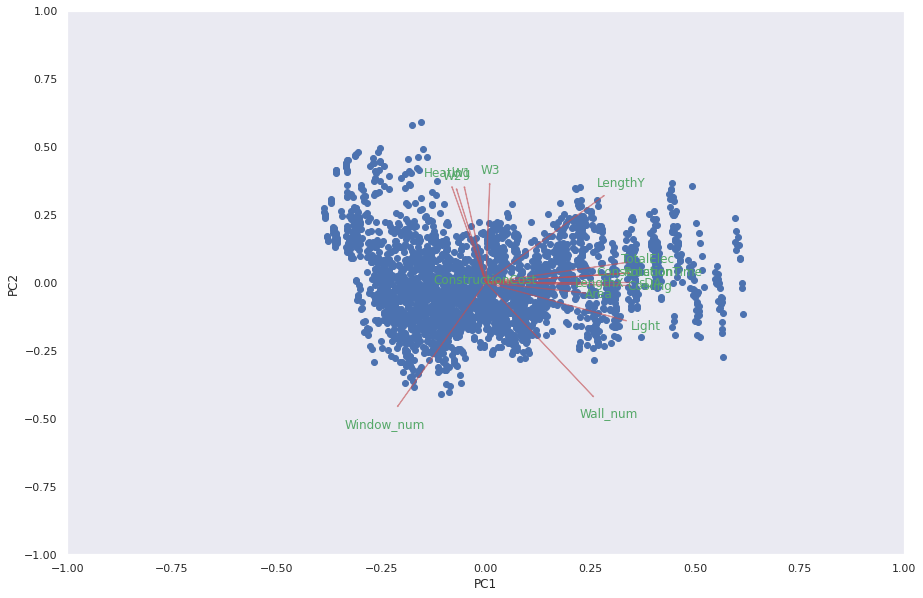

In [ ]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, data.columns[i], color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(data_reduced[:,0:2],np.transpose(model.components_[0:2, :]))
plt.show()


The important features are the ones that influence more the components and thus, have a large absolute value/score on the component.

In [ ]:
pcscores = pd.DataFrame(data_reduced)
loadings = pd.DataFrame(model.components_, columns=dataPCA.columns)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

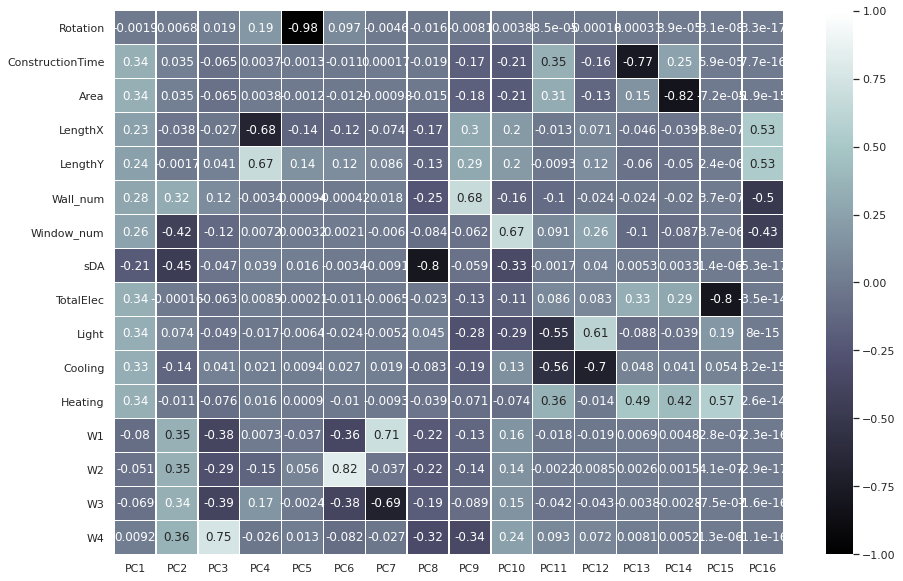

In [ ]:
ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, 
                 cmap="bone", vmin=-1, vmax=1, annot=True)

In [ ]:
# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = data.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

print(df)

       0                 1
0    PC0               sDA
1    PC1        Window_num
2    PC2                W3
3    PC3              Area
4    PC4  ConstructionCost
5    PC5                W1
6    PC6           Heating
7    PC7        Window_num
8    PC8           LengthY
9    PC9          Wall_num
10  PC10             Light
11  PC11             Light
12  PC12          Rotation
13  PC13  ConstructionTime
14  PC14               sDA
15  PC15           LengthX


In [ ]:
model.components_

array([[-1.90670649e-03,  3.39903338e-01,  3.39949678e-01,
         2.34529554e-01,  2.35877836e-01,  2.80391744e-01,
         2.55429381e-01, -2.09582402e-01,  3.41528603e-01,
         3.35899612e-01,  3.32557124e-01,  3.41251190e-01,
        -8.02921302e-02, -5.08932650e-02, -6.94764504e-02,
         9.19103117e-03],
       [ 6.83716268e-03,  3.45372706e-02,  3.50610897e-02,
        -3.81566506e-02, -1.68139195e-03,  3.17234708e-01,
        -4.17312932e-01, -4.53386176e-01, -1.60458911e-04,
         7.35925990e-02, -1.39373150e-01, -1.10523795e-02,
         3.49361445e-01,  3.48898608e-01,  3.41576852e-01,
         3.60976585e-01],
       [ 1.89756194e-02, -6.54551148e-02, -6.54432599e-02,
        -2.66898199e-02,  4.07954785e-02,  1.15436344e-01,
        -1.16362318e-01, -4.68649103e-02, -6.25865605e-02,
        -4.92466627e-02,  4.06849932e-02, -7.63078273e-02,
        -3.80815079e-01, -2.90103269e-01, -3.86701757e-01,
         7.53057311e-01],
       [ 1.86847576e-01,  3.67849679e

"\npcscores = pd.DataFrame(data_reduced)\nloadings = pd.DataFrame(model.components_, columns=dataPCA.columns)\nloadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]"

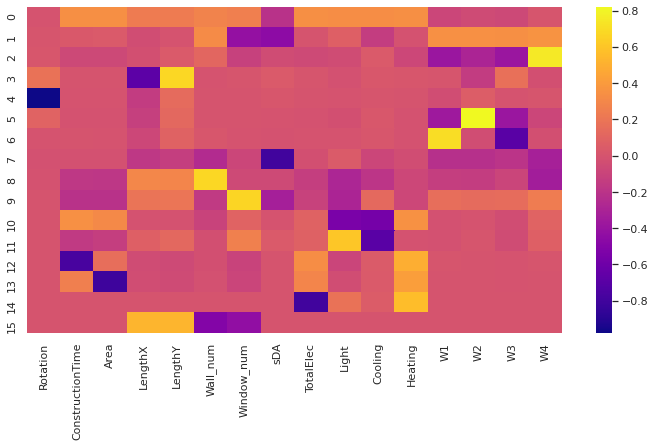

In [ ]:
df_comp = pd.DataFrame(model.components_, columns=dataPCA.columns)
plt.figure(figsize=(12, 6))
sns.heatmap(df_comp, cmap = 'plasma',)
"""
pcscores = pd.DataFrame(data_reduced)
loadings = pd.DataFrame(model.components_, columns=dataPCA.columns)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]"""

This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself. To get a better result

# BUILDING DATA

In [254]:
#Reorganize column
#data2 = data[['ConstructionCost', 'Rotation', 'LengthX', 'LengthY',	'Electricity', 	'sDA','ConstructionTime', '']]

In [264]:
data

,City,ConstructionTime,ConstructionCost,Rotation,LengthX,LengthY,Wall_num,Window_num,sDA,TotalElec,Light,Cooling,Heating,TerraceCost,WindowCost,ExtCost,IntCost,mesh1,mesh2,mesh3,mesh4,mesh5,mesh6,mesh7,mesh8,mesh9,mesh10,mesh11,mesh12,mesh13,mesh14,mesh15,mesh16,mesh17,mesh18,mesh19,mesh20,mesh21,mesh22,mesh23,mesh24,mesh25,mesh26,mesh27,mesh28,mesh29,mesh30,mesh31,mesh32,mesh33,mesh34,mesh35,mesh36,mesh37,mesh38,mesh39,mesh40,mesh41,mesh42,mesh43,mesh44,mesh45,mesh46,mesh47,mesh48,mesh49,mesh50,mesh51,mesh52,mesh53,mesh54,mesh55,mesh56,mesh57,mesh58,mesh59,mesh60,mesh61,mesh62,mesh63,mesh64
0,Ils-de-France,3,16176,0,3.960,5.180,10,4,89,7202,656,552,5994,0,4000,9613,2563,25,58,60,49,7,73,90,88,56,74,72,67,59,81,86,85,83,84,81,73,79,78,81,79,90,87,84,83,84,83,86,90,90,87,86,85,84,84,86,90,87,87,87,86,84,82,83,81,73,85,88,88,84,78,73,41,33,75,90,90.000,75.000,61.000,45.000,2.000
1,Ils-de-France,3,18817,0,3.960,6.400,10,6,88,8969,811,747,7411,0,6000,9613,3204,86,85,79,9,14,25,88,89,90,87,82,28,48,61,85,86,91,88,85,71,37,63,80,80,91,88,86,84,83,83,86,90,90,88,86,85,85,85,87,90,87,87,87,86,86,87,86,85,75,87,89,86,86,88,86,71,24,83,91,80.000,81.000,91.000,80.000,14.000
2,Ils-de-France,4,20817,0,3.960,7.620,10,8,92,10396,959,999,8437,0,8000,9613,3204,27,76,87,90,91,91,90,87,84,87,88,88,88,87,86,85,91,90,89,88,87,85,83,80,91,91,89,88,86,83,80,73,91,91,89,87,86,81,73,52,91,90,89,87,85,44,46,18,83,86,87,87,86,77,82,81,12,72,86,89.000,89.000,80.000,86.000,89.000
3,Ils-de-France,3,16253,0,5.180,3.960,8,6,95,7673,656,681,6337,0,6000,7690,2563,46,79,91,91,91,89,73,21,74,86,89,90,90,88,84,70,86,88,89,89,89,87,86,84,91,89,88,88,87,86,88,90,91,89,88,88,85,85,87,91,85,87,88,87,82,75,82,87,70,85,88,89,72,79,84,90,27,75,90,90.000,76.000,78.000,82.000,85.000
4,Ils-de-France,3,18137,0,5.180,5.180,11,5,77,8712,864,630,7218,0,5000,10574,2563,1,0,1,9,31,0,90,87,6,32,46,40,33,18,85,84,29,68,71,65,60,47,79,79,75,82,81,80,78,72,67,63,90,87,85,85,85,86,87,90,90,88,87,87,87,87,87,90,83,86,88,89,89,88,85,75,50,78,89,91.000,91.000,89.000,75.000,34.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,Ils-de-France,8,37634,290,8.840,7.620,14,12,84,22137,2369,1671,18098,0,12000,13458,12176,64,90,91,86,87,85,33,0,87,88,88,77,80,78,67,30,91,87,85,13,61,67,73,79,90,86,82,74,41,64,77,89,80,82,78,71,15,55,76,88,77,80,75,0,56,70,76,81,88,85,75,75,75,80,70,44,92,86,71,85.000,86.000,87.000,48.000,6.000
1352,Ils-de-France,10,43440,290,8.840,8.840,15,13,67,25486,2488,1862,21137,0,13000,14419,16021,2,40,86,84,0,87,79,88,26,66,66,68,0,80,78,79,86,82,75,65,0,31,72,87,91,87,81,69,0,43,72,84,91,88,83,64,0,5,33,2,91,88,85,0,0,71,80,87,89,88,87,0,0,77,81,67,49,88,91,0.000,0.000,82.000,88.000,25.000
1353,Ils-de-France,11,47290,290,10.060,8.840,15,13,69,25617,2490,1677,21450,13000,14419,16021,6,10,38,85,85,87,80,88,19,54,0,0,0,80,78,80,85,81,71,67,48,47,75,87,90,86,78,68,41,47,73,84,91,87,81,64,3,35,45,16,91,87,84,6,37,72,79,87,89,87,87,75,74,77,72,46,66,88,91,86,86.000,85.000,34.000,0.000,38.232
1354,Ils-de-France,12,49251,290,11.280,8.840,16,14,75,27816,2836,1825,23156,14000,15380,16021,8,13,10,53,88,89,79,87,30,59,44,0,78,80,78,81,85,80,69,58,62,34,72,86,90,85,76,64,46,36,70,85,91,87,80,74,31,0,44,20,91,87,84,80,49,68,76,87,89,88,87,86,77,78,71,49,70,89,91,90,89.000,88.000,53.000,0.000,38.232


In [265]:
print(data.size)
print(data.shape)

109836
(1356, 81)


Input declaration

In [267]:
#features =  ["ConstructionTime", "ConstructionCost", "Rotation" ]
#X = data.loc[:,'ConstructionCost':'ConstructionTime'].to_numpy() 
X = data.loc[:,'ConstructionTime':'Rotation'].to_numpy() 
#print(X.head())
X.shape


(1356, 3)

**Normalize Inputs : Y**

In [268]:
import joblib
# Load and instantiate a StandardSclaer 
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler().fit(X)

# Apply the scaler to our X-features
X_scaled = scalerX.transform(X)
print("X_scaled min & max: ", np.amin(X_scaled), np.amax(X_scaled))

print(X_scaled.shape)
print(X_scaled)
#Save Pkl file
joblib.dump(scalerX, 'scalerX2.pkl')
print("scalerX.pkl is exported")

X_scaled min & max:  -1.675766753274726 2.355091061353921
(1356, 3)
[[-1.24990854 -1.35353695 -1.67576675]
 [-1.24990854 -1.24663008 -1.67576675]
 [-1.10885694 -1.1656707  -1.67576675]
 ...
 [-0.12149577 -0.09405179  1.72839958]
 [ 0.01955583 -0.01467111  1.72839958]
 [-0.40359896 -0.34170655  1.72839958]]
scalerX.pkl is exported


**Target declaration  : X**

In [269]:
y = data.loc[:,'LengthX':].to_numpy()

print(y.shape)
print(y)
print(type(y))

#y = y.reshape(-1,6) #: 2 dimension. Reshape it for that MinMax works better
#print(y.shape)
#print(y)

(1356, 77)
[[ 3.96        5.18       10.         ... 61.         45.
   2.        ]
 [ 3.96        6.4        10.         ... 91.         80.
  14.        ]
 [ 3.96        7.62       10.         ... 80.         86.
  89.        ]
 ...
 [10.06        8.84       15.         ... 34.          0.
  38.23170732]
 [11.28        8.84       16.         ... 53.          0.
  38.23170732]
 [ 9.91        7.62       13.         ... 47.          6.
  38.23170732]]
<class 'numpy.ndarray'>


In [270]:
from sklearn.preprocessing import StandardScaler #/MinMaxScaler
scalerY = StandardScaler().fit(y)

#Scale Y to MinMax ? In this case it makes sense to use MinMax scaling because the wage seems like a relative range. Scale it from Domain 0 to 1
# Apply the scaler to our Y-features
y_scaled = scalerY.transform(y)


print("Y_scaled min & max:", np.amin(y_scaled), np.amax(y_scaled))
print(y_scaled)
print(y_scaled.shape)


#Save Pkl file
joblib.dump(scalerY, 'scalerY2.pkl')
print("y_scaled.pkl.pkl is exported")

Y_scaled min & max: -7.842167971808967 29.537690807391115
[[-1.67262887 -1.36714387 -1.07312133 ... -0.44396893 -0.21787274
  -1.44335931]
 [-1.67262887 -0.9554881  -1.07312133 ...  1.02102034  0.82263809
  -0.96531638]
 [-1.67262887 -0.54383234 -1.07312133 ...  0.48385761  1.00101138
   2.02245198]
 ...
 [ 0.14406121 -0.13217657  0.00974258 ... -1.76245926 -1.55567237
   0.        ]
 [ 0.50739923 -0.13217657  0.22631536 ... -0.83463273 -1.55567237
   0.        ]
 [ 0.0993885  -0.54383234 -0.42340298 ... -1.12763058 -1.37729909
   0.        ]]
(1356, 77)
y_scaled.pkl.pkl is exported


## SPLIT INTO TRAIN AND TEST

In [271]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2, random_state = 21)

In [272]:
#visualize our data
#we can see that scikitlearn doesnt care if it is a dataframe or a numpy array, because they all function on the same way 
print("TRAIN", "input", X_train.shape, "output", y_train.shape)
print("TEST", "input", X_test.shape, "output", y_test.shape)
print(X_train)

TRAIN input (1084, 3) output (1084, 77)
TEST input (272, 3) output (272, 77)
[[-1.24990854 -1.27415627 -1.32361162]
 [ 1.006917    1.09718461 -0.14976116]
 [ 1.57112338  0.86989113  0.55454912]
 ...
 [ 1.57112338  0.86989113  0.20239398]
 [ 1.57112338  0.86989113  1.37624444]
 [-1.10885694 -1.06503818  0.78931921]]


In [260]:
#print(X_test)
#print(y_test)

# BUILD N.N MODEL

From the cheatSheet
Regression between 0 and 1>> 
      activation = relu for hidden layers / sigmoid for final layer
      loss = mean squared error
      optimizer = adam
      input from data, is 3 columns
      output is 6 value prediction

In [327]:
# Instantiate a sequential model
model = tf.keras.models.Sequential()
n_cols = X_train.shape[1]  

#opt = tf.keras.optimizers.SGD(learning_rate=0.001)

# Add 2 dense layers of 50 and 32 neurons each
model.add(tf.keras.layers.Dense(512, input_shape=(n_cols,), activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(93, activation='relu'))

"""model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))"""

# Add a dense layer with value of output
model.add(tf.keras.layers.Dense(77, activation= "linear")) #/Or None
  
# Compile your model 
model.compile(optimizer = "adam", loss = "mean_squared_error", metrics = ["mean_absolute_error", 'mean_squared_error'])


In the last layer of the network, we usually add a sigmoid activation function for binary classification. Here since it is a regression problem, you should remove the activation from the last layer and it will work fine.
On another point, it is not necessary to scale the y, scaling is usually done on x to improve gradient propagation. You can either scale or not the y, it should normally have similar performance.

In [286]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_126 (Dense)            (None, 512)               2048      
_________________________________________________________________
dense_127 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_128 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_129 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_130 (Dense)            (None, 93)                11997     
_________________________________________________________________
dense_131 (Dense)            (None, 77)                7238      
Total params: 119,971
Trainable params: 119,971
Non-trainable params: 0
_______________________________________________

# TRAIN MODEL

In [328]:
# Fit your model to the training data for 200 epochs
#we assign this to history variable so we can plot the training data
#history = model.fit(X_train,y_train,epochs=200, batch_size= 10, validation_split=0.2)
#history = model.fit(X_test,y_test,epochs=200, batch_size= 10, validation_split=0.2)
history = model.fit(X_train,y_train, epochs=650, validation_split=0.2, batch_size=5, shuffle = True, validation_data = (X_test, y_test))
#Increase until overfit to see where is max epochs!

Epoch 1/650
174/174 [==============================] - 1s 3ms/step - loss: 0.7475 - mean_absolute_error: 0.6241 - mean_squared_error: 0.7475 - val_loss: 0.7195 - val_mean_absolute_error: 0.6027 - val_mean_squared_error: 0.7195
Epoch 2/650
174/174 [==============================] - 0s 3ms/step - loss: 0.6374 - mean_absolute_error: 0.5497 - mean_squared_error: 0.6374 - val_loss: 0.6509 - val_mean_absolute_error: 0.5556 - val_mean_squared_error: 0.6509
Epoch 3/650
174/174 [==============================] - 0s 3ms/step - loss: 0.5914 - mean_absolute_error: 0.5120 - mean_squared_error: 0.5914 - val_loss: 0.6187 - val_mean_absolute_error: 0.5188 - val_mean_squared_error: 0.6187
Epoch 4/650
174/174 [==============================] - 0s 3ms/step - loss: 0.5681 - mean_absolute_error: 0.4971 - mean_squared_error: 0.5681 - val_loss: 0.5901 - val_mean_absolute_error: 0.4984 - val_mean_squared_error: 0.5901
Epoch 5/650
174/174 [==============================] - 0s 3ms/step - loss: 0.5360 - mean_abs

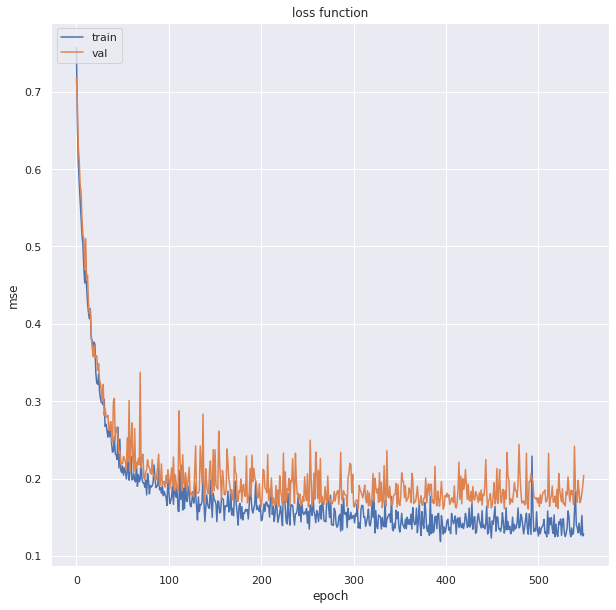

In [315]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss function')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.ylim((0,10))
plt.show()

#EVALUIATE MODEL ON TEST DATA

In [316]:
# Evaluate your model accuracy on the test data
loss_test = model.evaluate(X_test,y_test)

# Print accuracy
print('mse_test:', loss_test)

9/9 [==============================] - 0s 2ms/step - loss: 0.1653 - mean_absolute_error: 0.1693 - mean_squared_error: 0.1653
mse_test: [0.16530679166316986, 0.1692589670419693, 0.16530679166316986]


# PLOT ERROR


array([[ 9.299963  ,  6.9114156 , 13.257344  , ..., 49.94889   ,
        22.27304   , 31.147049  ],
       [10.262931  ,  9.822027  , 15.977771  , ..., 41.201187  ,
         5.2648396 , 38.003796  ],
       [ 6.484592  ,  7.5929065 , 13.955435  , ..., 67.60728   ,
        14.366948  , -0.54984784],
       ...,
       [12.52558   , 10.906385  , 14.793955  , ..., 85.90226   ,
        67.50459   , 38.61313   ],
       [ 4.9319005 ,  5.8221455 , 10.849773  , ..., 87.87813   ,
        77.25685   , 31.737219  ],
       [12.908141  , 13.452054  , 15.985255  , ..., 76.95579   ,
        68.64546   , 37.242252  ]], dtype=float32)

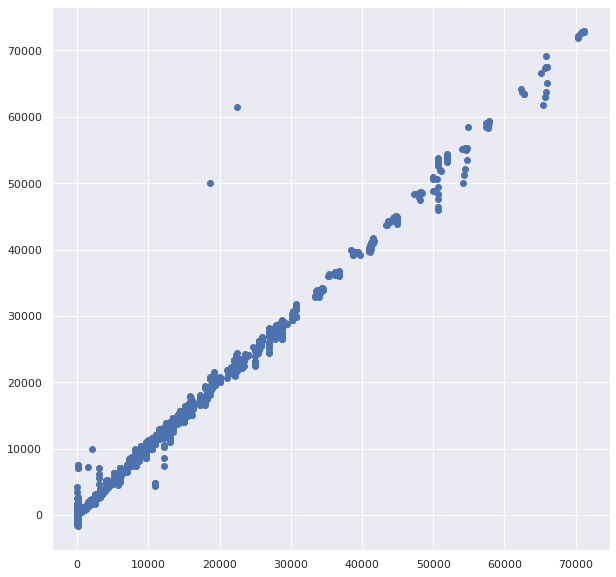

In [35]:
y_pred = scalerY.inverse_transform(model.predict(X_test))
y_truth = scalerY.inverse_transform(y_test)

plt.scatter(y_truth,y_pred)
y_pred

* If above diagram isn't diagonal, it means that our training isn't good

## PREDICTION COMPARAISON

### SETTING


In [36]:
def plot_comparison(x_val, pred, truth, xlab, ylab):
  fig, ax1 = plt.subplots()
  ax1.plot(x_val, truth, color = "red", label = "truth",linestyle='None', marker = "o", markersize = 5)
  ax1.plot(x_val, pred, color = "blue", label = "pred",linestyle='None', marker = "o", markersize = 4, alpha = 0.5)

  ax1.set_xlabel(xlab)
  ax1.set_ylabel(ylab)
  ax1.legend()
  fig.set_figheight(10)
  fig.set_figwidth(20)
  plt.title('Prediction Comparison')
  plt.show()

In [37]:
X_test.shape

(272, 3)

In [39]:
print(X_test[:,1])

[-0.4769492   0.1290318  -0.7620072  -1.06503818  2.35509106  1.25683652
 -1.06503818 -1.24663008 -0.59183057  0.59434587 -0.01467111 -1.50918137
  1.09718461 -1.24663008  0.02463467 -1.35042001 -0.10821968  0.02463467
 -1.1656707  -0.59029234 -0.59183057  0.33070163 -0.4849237  -1.06345947
 -0.98407879 -0.09405179 -0.59029234 -1.06503818  0.02463467 -1.06503818
 -0.35587444 -0.35587444  0.1290318  -0.84142836  0.29022193 -0.66809431
  0.20845295  1.9920287   0.9275747   0.86989113 -1.06503818 -0.10821968
  2.35509106  0.9275747  -0.66809431 -1.1656707   0.33070163 -0.01467111
  0.9275747  -1.35353695  1.9920287   1.25683652 -0.34170655  0.84576524
 -0.59183057 -1.1656707  -1.1656707   0.9275747  -1.1656707  -0.98407879
 -0.09405179 -0.9856575   0.33070163  1.28828924 -0.24989861 -0.4769492
 -0.84142836  0.20845295 -0.59183057  0.9275747  -0.84142836 -1.06503818
 -0.59183057 -0.01467111  1.09718461 -1.50918137 -0.34170655  1.28828924
 -0.10821968 -0.48338547  0.59434587  0.02463467 -1.

In [40]:
X

array([[    3, 16176,     0],
       [    3, 18817,     0],
       [    4, 20817,     0],
       ...,
       [   11, 47290,   290],
       [   12, 49251,   290],
       [    9, 41172,   290]])

In [41]:
data.head()

,City,ConstructionTime,ConstructionCost,Rotation,LengthX,LengthY,Wall_num,Window_num,sDA,TotalElec,Light,Cooling,Heating,TerraceCost,WindowCost,ExtCost,IntCost,mesh1,mesh2,mesh3,mesh4,mesh5,mesh6,mesh7,mesh8,mesh9,mesh10,mesh11,mesh12,mesh13,mesh14,mesh15,mesh16,mesh17,mesh18,mesh19,mesh20,mesh21,mesh22,mesh23,mesh24,mesh25,mesh26,mesh27,mesh28,mesh29,mesh30,mesh31,mesh32,mesh33,mesh34,mesh35,mesh36,mesh37,mesh38,mesh39,mesh40,mesh41,mesh42,mesh43,mesh44,mesh45,mesh46,mesh47,mesh48,mesh49,mesh50,mesh51,mesh52,mesh53,mesh54,mesh55,mesh56,mesh57,mesh58,mesh59,mesh60,mesh61,mesh62,mesh63,mesh64
0,Ils-de-France,3,16176,0,3.960,5.180,10,4,89,7202,656,552,5994,0,4000,9613,2563,25,58,60,49,7,73,90,88,56,74,72,67,59,81,86,85,83,84,81,73,79,78,81,79,90,87,84,83,84,83,86,90,90,87,86,85,84,84,86,90,87,87,87,86,84,82,83,81,73,85,88,88,84,78,73,41,33,75,90,90.000,75.000,61.000,45.000,2.000
1,Ils-de-France,3,18817,0,3.960,6.400,10,6,88,8969,811,747,7411,0,6000,9613,3204,86,85,79,9,14,25,88,89,90,87,82,28,48,61,85,86,91,88,85,71,37,63,80,80,91,88,86,84,83,83,86,90,90,88,86,85,85,85,87,90,87,87,87,86,86,87,86,85,75,87,89,86,86,88,86,71,24,83,91,80.000,81.000,91.000,80.000,14.000
2,Ils-de-France,4,20817,0,3.960,7.620,10,8,92,10396,959,999,8437,0,8000,9613,3204,27,76,87,90,91,91,90,87,84,87,88,88,88,87,86,85,91,90,89,88,87,85,83,80,91,91,89,88,86,83,80,73,91,91,89,87,86,81,73,52,91,90,89,87,85,44,46,18,83,86,87,87,86,77,82,81,12,72,86,89.000,89.000,80.000,86.000,89.000
3,Ils-de-France,3,16253,0,5.180,3.960,8,6,95,7673,656,681,6337,0,6000,7690,2563,46,79,91,91,91,89,73,21,74,86,89,90,90,88,84,70,86,88,89,89,89,87,86,84,91,89,88,88,87,86,88,90,91,89,88,88,85,85,87,91,85,87,88,87,82,75,82,87,70,85,88,89,72,79,84,90,27,75,90,90.000,76.000,78.000,82.000,85.000
4,Ils-de-France,3,18137,0,5.180,5.180,11,5,77,8712,864,630,7218,0,5000,10574,2563,1,0,1,9,31,0,90,87,6,32,46,40,33,18,85,84,29,68,71,65,60,47,79,79,75,82,81,80,78,72,67,63,90,87,85,85,85,86,87,90,90,88,87,87,87,87,87,90,83,86,88,89,89,88,85,75,50,78,89,91.000,91.000,89.000,75.000,34.000


In [42]:
Cost_test = (scalerX.inverse_transform(X_test)[:,0])
print(Cost_test)

[ 8. 12.  6.  4. 25. 21.  4.  3.  7. 15. 12.  2. 19.  3. 12.  3. 11. 12.
  4.  7.  7. 16.  8.  4.  5. 11.  7.  4. 12.  4.  9.  9. 12.  5. 14.  7.
 14. 27. 19. 23.  4. 11. 25. 19.  7.  4. 16. 12. 19.  3. 27. 21.  9. 17.
  7.  4.  4. 19.  4.  5. 11.  5. 16. 21. 10.  8.  5. 14.  7. 19.  5.  4.
  7. 12. 19.  2.  9. 21. 11.  8. 15. 12.  4.  3. 21. 17. 15.  6. 25.  6.
  7. 11. 12. 27. 15. 25. 15. 23.  7.  3.  2. 12.  8. 14.  7.  4.  8. 16.
  8.  8. 15.  2.  4.  4.  8.  5.  9.  5.  5.  6.  3. 27.  5. 12.  9.  3.
  7. 23. 19.  5.  3. 12. 14. 25. 12. 19. 25. 18. 19. 23. 23. 21.  7. 27.
 18.  9. 18.  7.  7. 17.  9.  6.  5.  7.  4.  7. 21. 11.  3. 12. 10. 10.
 25. 23. 21. 19. 21. 19. 19.  3.  4.  7. 19. 11. 27.  3.  7. 15.  9.  9.
 15. 17. 15. 14. 27.  7.  3.  8.  9. 12. 25. 10. 15.  4. 23.  3.  9. 27.
 14. 17. 18.  7. 17. 25. 15.  4.  6. 25.  8. 23. 25. 16.  5.  6. 21.  5.
  3.  5.  9. 16. 15. 12.  3. 27. 23.  8.  7.  4.  4. 27. 21. 14. 19. 23.
 23.  6.  3.  6. 19. 23.  6.  4. 18.  4.  4. 17.  3

In [43]:
Time_test = (scalerX.inverse_transform(X_test)[:,2])
print(Time_test)

[ 20. 210. 130. 280. 110. 250. 160.  70. 140. 240.  70.  70. 150. 110.
 280. 280. 200. 110. 260.  70. 120. 200. 280.  60.  90. 260. 150. 290.
 200. 200. 280. 290. 130. 260. 270. 120. 240. 280. 270.  20. 260. 260.
   0. 260.  40. 150. 100. 240. 230. 290. 260. 230.   0.  30. 100. 210.
  50. 280.  90. 210. 200. 280. 190. 260. 140. 100.  30. 130. 210.   0.
 170. 100. 260.  50.  80.  10. 240. 210.  60.  70. 250. 220. 110. 130.
  30. 150. 120. 260. 140.  90. 170. 170.  70. 190.  80. 140. 240. 140.
 210. 190. 210.  10. 240. 130. 290. 100. 210. 110.  80.  10. 260.  60.
  20. 220.  30.  50. 180. 110. 240. 290. 110.  20. 150. 280.  90. 210.
  20. 120. 150. 110.  50.   0.  70. 200. 110.  20. 210. 140. 170.  60.
  40.  60.  50.   0. 150.  60.  30. 270. 230.  40. 110. 120. 250.  70.
 260. 140. 230. 240.  60. 230. 210. 230. 160. 100.   0. 110. 160. 120.
 280. 280.  70. 230. 200. 270. 110.  10.  60. 120. 280. 150. 110.  70.
  10.  10. 250.   0.  20. 220. 210. 200. 130. 150. 110.  60. 260.  40.
 170. 

In [44]:
Rotation_test = (scalerX.inverse_transform(X_test)[:,1])
print(Rotation_test)

[ 37831.  52801.  30789.  23303. 107793.  80662.  23303.  18817.  34993.
  64296.  49251.  12331.  76718.  18817.  50222.  16253.  46940.  50222.
  20817.  35031.  34993.  57783.  37634.  23342.  25303.  47290.  35031.
  23303.  50222.  23303.  40822.  40822.  52801.  28827.  56783.  33109.
  54763.  98824.  72528.  71103.  23303.  46940. 107793.  72528.  33109.
  20817.  57783.  49251.  72528.  16176.  98824.  80662.  41172.  70507.
  34993.  20817.  20817.  72528.  20817.  25303.  47290.  25264.  57783.
  81439.  43440.  37831.  28827.  54763.  34993.  72528.  28827.  23303.
  34993.  49251.  76718.  12331.  41172.  81439.  46940.  37672.  64296.
  50222.  20817.  18137.  80662.  70507.  64296.  30789.  93543.  29789.
  33109.  47290.  50222.  98824.  64296. 107793.  64296.  85091.  33109.
  16176.  12331.  52801.  37634.  56783.  35031.  23342.  37634.  57783.
  37831.  37634.  64296.  12331.  20817.  23303.  37831.  25303.  40822.
  25264.  25264.  30789.  16253.  98824.  25303.  4

In [45]:
#Visualize original Y data for call in the bottom plot
y_head = data.loc[:,'LengthX':]
y_head 

,LengthX,LengthY,Wall_num,Window_num,sDA,TotalElec,Light,Cooling,Heating,TerraceCost,WindowCost,ExtCost,IntCost,mesh1,mesh2,mesh3,mesh4,mesh5,mesh6,mesh7,mesh8,mesh9,mesh10,mesh11,mesh12,mesh13,mesh14,mesh15,mesh16,mesh17,mesh18,mesh19,mesh20,mesh21,mesh22,mesh23,mesh24,mesh25,mesh26,mesh27,mesh28,mesh29,mesh30,mesh31,mesh32,mesh33,mesh34,mesh35,mesh36,mesh37,mesh38,mesh39,mesh40,mesh41,mesh42,mesh43,mesh44,mesh45,mesh46,mesh47,mesh48,mesh49,mesh50,mesh51,mesh52,mesh53,mesh54,mesh55,mesh56,mesh57,mesh58,mesh59,mesh60,mesh61,mesh62,mesh63,mesh64
0,3.960,5.180,10,4,89,7202,656,552,5994,0,4000,9613,2563,25,58,60,49,7,73,90,88,56,74,72,67,59,81,86,85,83,84,81,73,79,78,81,79,90,87,84,83,84,83,86,90,90,87,86,85,84,84,86,90,87,87,87,86,84,82,83,81,73,85,88,88,84,78,73,41,33,75,90,90.000,75.000,61.000,45.000,2.000
1,3.960,6.400,10,6,88,8969,811,747,7411,0,6000,9613,3204,86,85,79,9,14,25,88,89,90,87,82,28,48,61,85,86,91,88,85,71,37,63,80,80,91,88,86,84,83,83,86,90,90,88,86,85,85,85,87,90,87,87,87,86,86,87,86,85,75,87,89,86,86,88,86,71,24,83,91,80.000,81.000,91.000,80.000,14.000
2,3.960,7.620,10,8,92,10396,959,999,8437,0,8000,9613,3204,27,76,87,90,91,91,90,87,84,87,88,88,88,87,86,85,91,90,89,88,87,85,83,80,91,91,89,88,86,83,80,73,91,91,89,87,86,81,73,52,91,90,89,87,85,44,46,18,83,86,87,87,86,77,82,81,12,72,86,89.000,89.000,80.000,86.000,89.000
3,5.180,3.960,8,6,95,7673,656,681,6337,0,6000,7690,2563,46,79,91,91,91,89,73,21,74,86,89,90,90,88,84,70,86,88,89,89,89,87,86,84,91,89,88,88,87,86,88,90,91,89,88,88,85,85,87,91,85,87,88,87,82,75,82,87,70,85,88,89,72,79,84,90,27,75,90,90.000,76.000,78.000,82.000,85.000
4,5.180,5.180,11,5,77,8712,864,630,7218,0,5000,10574,2563,1,0,1,9,31,0,90,87,6,32,46,40,33,18,85,84,29,68,71,65,60,47,79,79,75,82,81,80,78,72,67,63,90,87,85,85,85,86,87,90,90,88,87,87,87,87,87,90,83,86,88,89,89,88,85,75,50,78,89,91.000,91.000,89.000,75.000,34.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,8.840,7.620,14,12,84,22137,2369,1671,18098,0,12000,13458,12176,64,90,91,86,87,85,33,0,87,88,88,77,80,78,67,30,91,87,85,13,61,67,73,79,90,86,82,74,41,64,77,89,80,82,78,71,15,55,76,88,77,80,75,0,56,70,76,81,88,85,75,75,75,80,70,44,92,86,71,85.000,86.000,87.000,48.000,6.000
1352,8.840,8.840,15,13,67,25486,2488,1862,21137,0,13000,14419,16021,2,40,86,84,0,87,79,88,26,66,66,68,0,80,78,79,86,82,75,65,0,31,72,87,91,87,81,69,0,43,72,84,91,88,83,64,0,5,33,2,91,88,85,0,0,71,80,87,89,88,87,0,0,77,81,67,49,88,91,0.000,0.000,82.000,88.000,25.000
1353,10.060,8.840,15,13,69,25617,2490,1677,21450,13000,14419,16021,6,10,38,85,85,87,80,88,19,54,0,0,0,80,78,80,85,81,71,67,48,47,75,87,90,86,78,68,41,47,73,84,91,87,81,64,3,35,45,16,91,87,84,6,37,72,79,87,89,87,87,75,74,77,72,46,66,88,91,86,86.000,85.000,34.000,0.000,38.232
1354,11.280,8.840,16,14,75,27816,2836,1825,23156,14000,15380,16021,8,13,10,53,88,89,79,87,30,59,44,0,78,80,78,81,85,80,69,58,62,34,72,86,90,85,76,64,46,36,70,85,91,87,80,74,31,0,44,20,91,87,84,80,49,68,76,87,89,88,87,86,77,78,71,49,70,89,91,90,89.000,88.000,53.000,0.000,38.232


### PLOTS_ Input : Cost - Output : Length Y

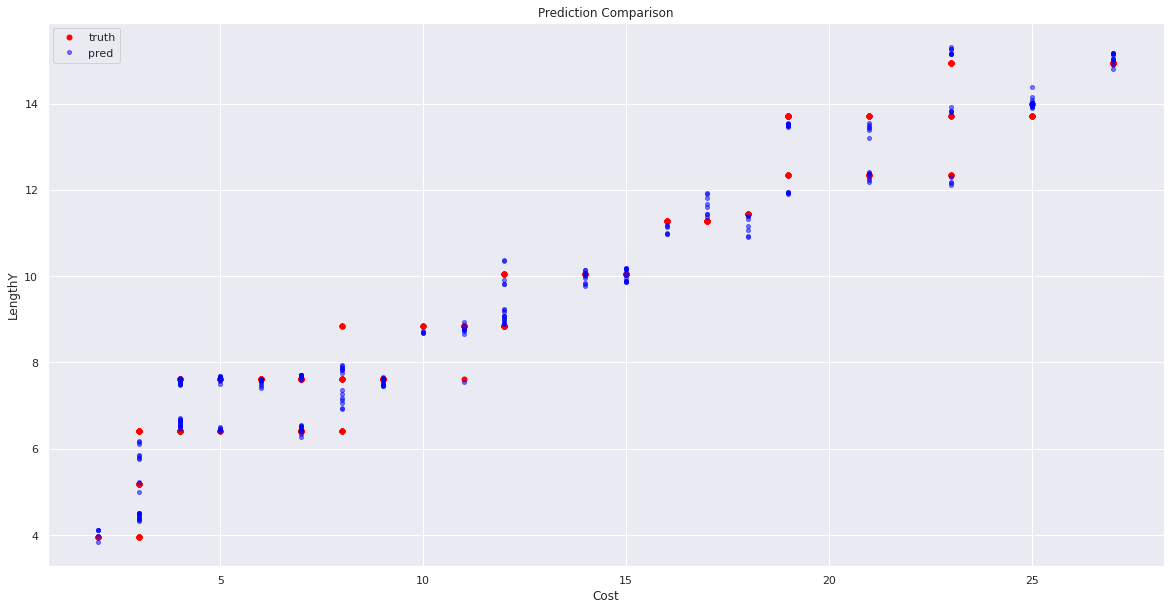

In [46]:
plot_comparison(Cost_test, y_pred[:, 1], y_truth[:, 1], "Cost", "LengthY")

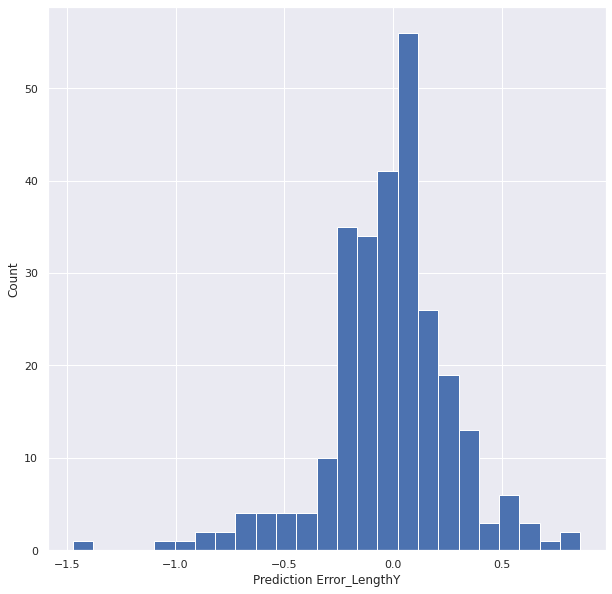

In [47]:
error = y_pred [:, 1] - y_truth [:, 1]
plt.hist(error, bins=25)
plt.xlabel('Prediction Error_LengthY')
_ = plt.ylabel('Count')

### PLOTS_ Input : Time - Output : Wall Pannels

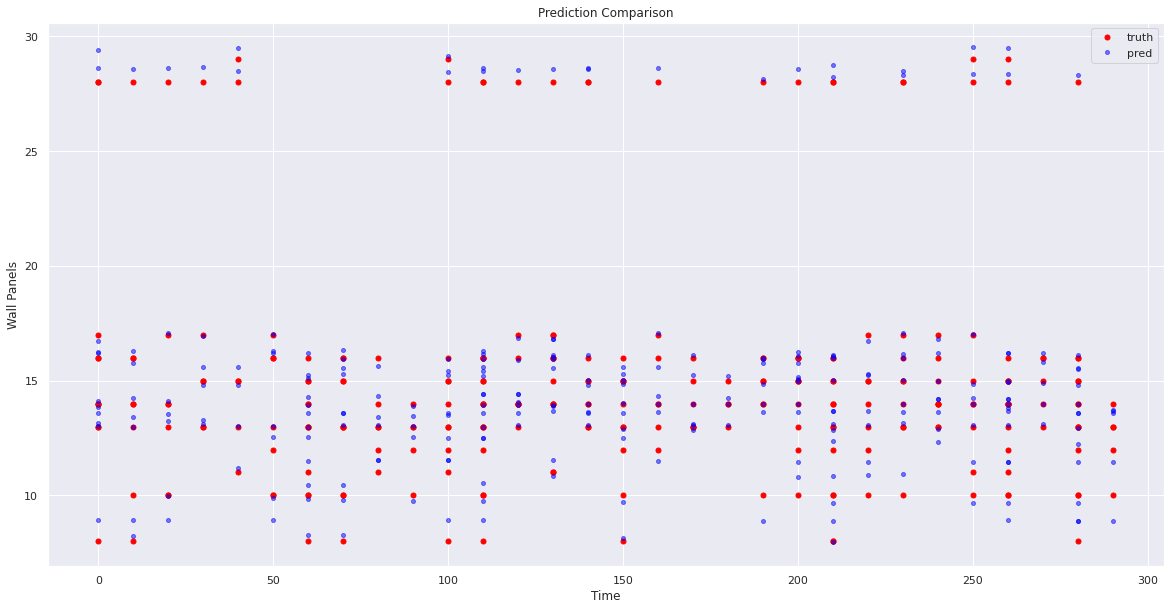

In [48]:
plot_comparison(Time_test, y_pred[:, 2], y_truth[:, 2],  "Time", "Wall Panels")

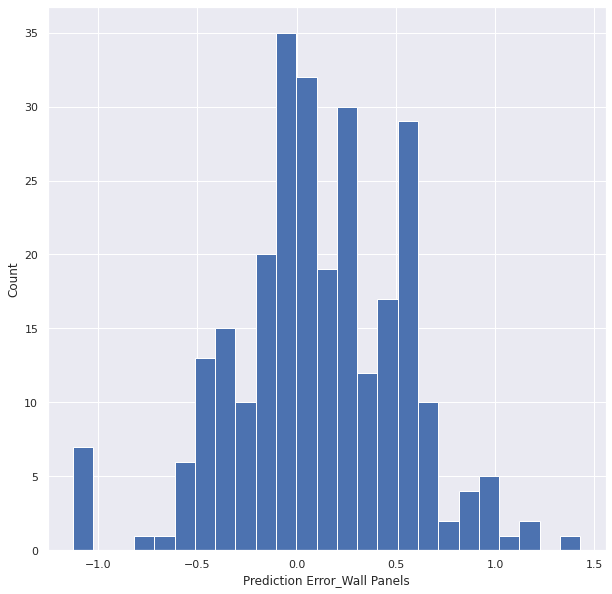

In [49]:
error = y_pred [:, 2] - y_truth [:, 2]
plt.hist(error, bins=25)
plt.xlabel('Prediction Error_Wall Panels')
_ = plt.ylabel('Count')

### PLOT_ Input: Rotation - Output: sDA 

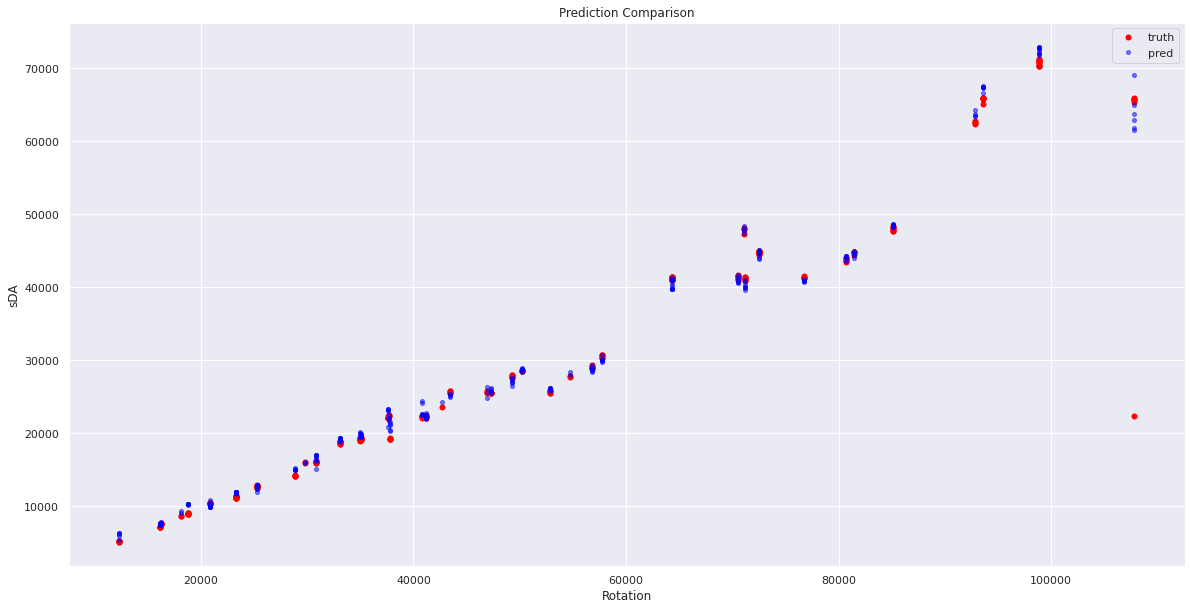

In [50]:
plot_comparison(Rotation_test, y_pred[:, 5], y_truth[:, 5],  "Rotation", "sDA")

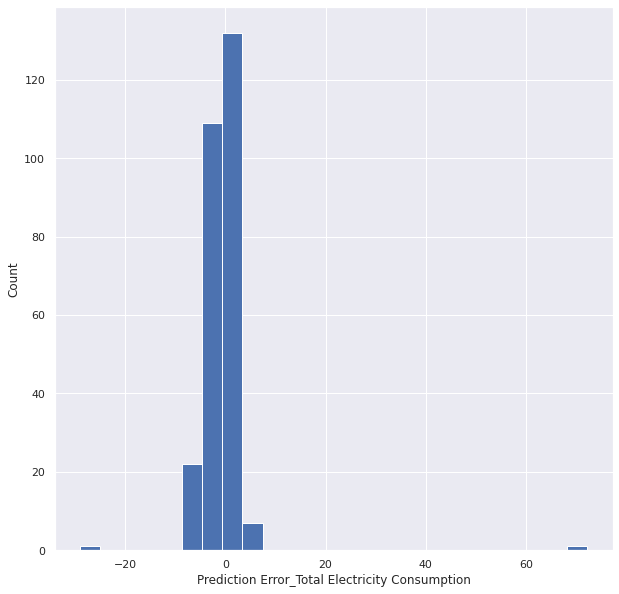

In [51]:
error = y_pred[:, 4] - y_truth[:, 4]
plt.hist(error, bins=25)
plt.xlabel('Prediction Error_Total Electricity Consumption')
_ = plt.ylabel('Count')

### PLOTS_ Input : Time - Output : 

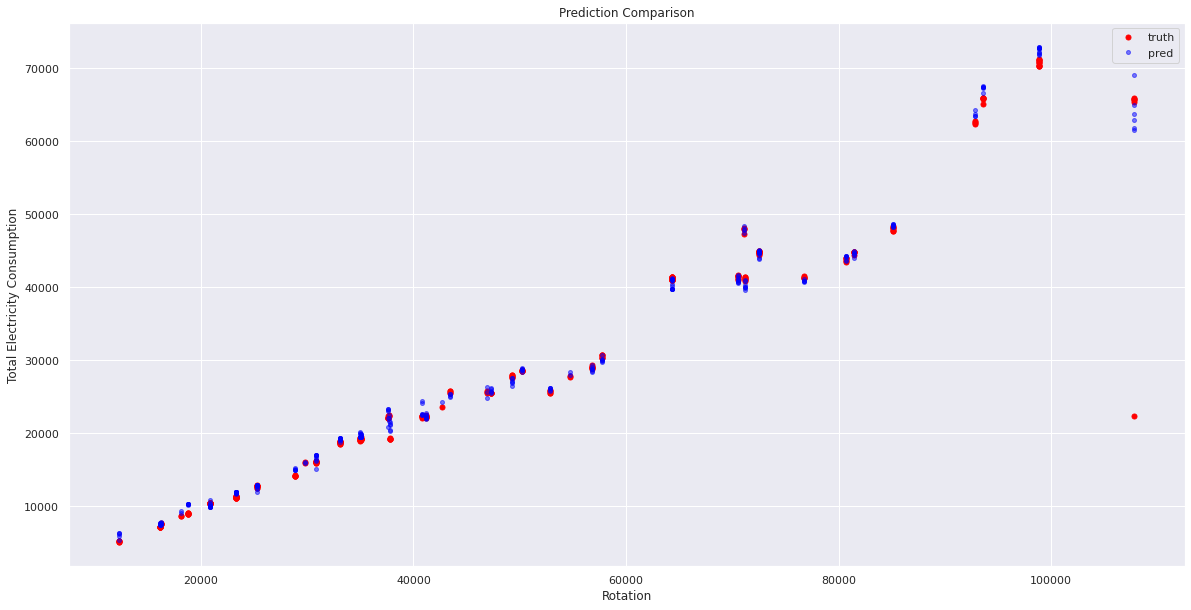

In [52]:
plot_comparison(Rotation_test, y_pred[:, 5], y_truth[:, 5],  "Rotation", "Total Electricity Consumption")

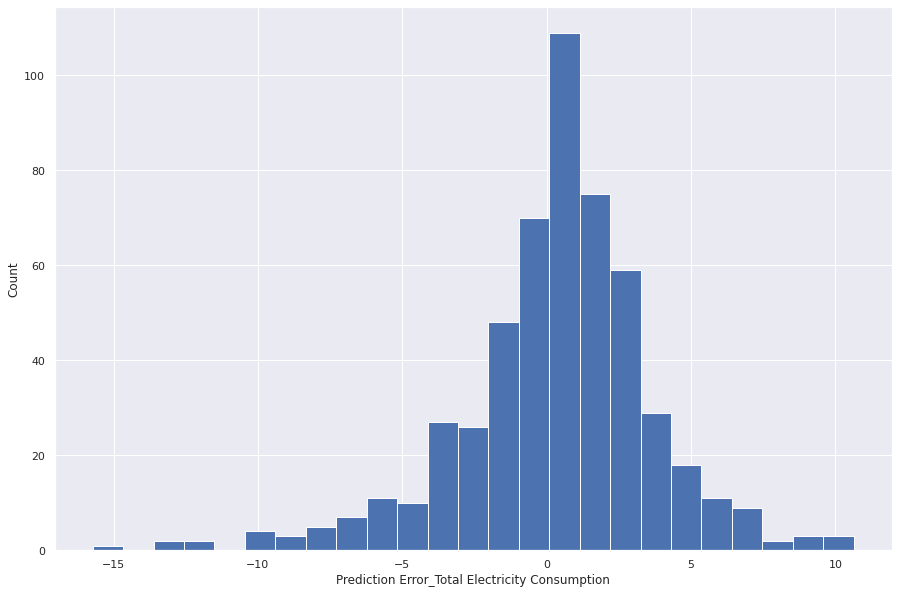

In [ ]:
error = y_pred[:, 2] - y_truth[:, 2]
plt.hist(error, bins=25)
plt.xlabel('Prediction Error_Total Electricity Consumption')
_ = plt.ylabel('Count')

# SAVE THE MODEL

In [307]:
model.save('regression_model_V5.h5')
print("h.5 model saved")

h.5 model saved


# PREDICTION TEST


In [322]:
    from tensorflow import keras
    model = keras.models.load_model(r'/content/regression_model_V5.h5')
    model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_150 (Dense)            (None, 512)               2048      
_________________________________________________________________
dense_151 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_152 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_153 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_154 (Dense)            (None, 93)                11997     
_________________________________________________________________
dense_155 (Dense)            (None, 77)                7238      
Total params: 119,971
Trainable params: 119,971
Non-trainable params: 0
_______________________________________________

In [323]:
LDscalerX = joblib.load('/content/scalerX2.pkl') 
LDscalerY = joblib.load('/content/scalerY2.pkl') 
print('SCALERLOADED')
print('SCALERLOADED')


SCALERLOADED
SCALERLOADED


In [293]:
data.head()

,City,ConstructionTime,ConstructionCost,Rotation,LengthX,LengthY,Wall_num,Window_num,sDA,TotalElec,Light,Cooling,Heating,TerraceCost,WindowCost,ExtCost,IntCost,mesh1,mesh2,mesh3,mesh4,mesh5,mesh6,mesh7,mesh8,mesh9,mesh10,mesh11,mesh12,mesh13,mesh14,mesh15,mesh16,mesh17,mesh18,mesh19,mesh20,mesh21,mesh22,mesh23,mesh24,mesh25,mesh26,mesh27,mesh28,mesh29,mesh30,mesh31,mesh32,mesh33,mesh34,mesh35,mesh36,mesh37,mesh38,mesh39,mesh40,mesh41,mesh42,mesh43,mesh44,mesh45,mesh46,mesh47,mesh48,mesh49,mesh50,mesh51,mesh52,mesh53,mesh54,mesh55,mesh56,mesh57,mesh58,mesh59,mesh60,mesh61,mesh62,mesh63,mesh64
0,Ils-de-France,3,16176,0,3.960,5.180,10,4,89,7202,656,552,5994,0,4000,9613,2563,25,58,60,49,7,73,90,88,56,74,72,67,59,81,86,85,83,84,81,73,79,78,81,79,90,87,84,83,84,83,86,90,90,87,86,85,84,84,86,90,87,87,87,86,84,82,83,81,73,85,88,88,84,78,73,41,33,75,90,90.000,75.000,61.000,45.000,2.000
1,Ils-de-France,3,18817,0,3.960,6.400,10,6,88,8969,811,747,7411,0,6000,9613,3204,86,85,79,9,14,25,88,89,90,87,82,28,48,61,85,86,91,88,85,71,37,63,80,80,91,88,86,84,83,83,86,90,90,88,86,85,85,85,87,90,87,87,87,86,86,87,86,85,75,87,89,86,86,88,86,71,24,83,91,80.000,81.000,91.000,80.000,14.000
2,Ils-de-France,4,20817,0,3.960,7.620,10,8,92,10396,959,999,8437,0,8000,9613,3204,27,76,87,90,91,91,90,87,84,87,88,88,88,87,86,85,91,90,89,88,87,85,83,80,91,91,89,88,86,83,80,73,91,91,89,87,86,81,73,52,91,90,89,87,85,44,46,18,83,86,87,87,86,77,82,81,12,72,86,89.000,89.000,80.000,86.000,89.000
3,Ils-de-France,3,16253,0,5.180,3.960,8,6,95,7673,656,681,6337,0,6000,7690,2563,46,79,91,91,91,89,73,21,74,86,89,90,90,88,84,70,86,88,89,89,89,87,86,84,91,89,88,88,87,86,88,90,91,89,88,88,85,85,87,91,85,87,88,87,82,75,82,87,70,85,88,89,72,79,84,90,27,75,90,90.000,76.000,78.000,82.000,85.000
4,Ils-de-France,3,18137,0,5.180,5.180,11,5,77,8712,864,630,7218,0,5000,10574,2563,1,0,1,9,31,0,90,87,6,32,46,40,33,18,85,84,29,68,71,65,60,47,79,79,75,82,81,80,78,72,67,63,90,87,85,85,85,86,87,90,90,88,87,87,87,87,87,90,83,86,88,89,89,88,85,75,50,78,89,91.000,91.000,89.000,75.000,34.000


In [324]:
Newdata = [[3,16176,0]]
Newdata = np.array(Newdata) # dtype=np.float64)
Newdata = Newdata.astype(np.float32)

Newdata_scaled = scalerX.transform(Newdata)

print("Newdata:", Newdata_scaled .shape)
print(Newdata_scaled )

Newdata: (1, 3)
[[-1.2499086 -1.3535368 -1.6757668]]


In [325]:
prediction = model.predict(Newdata_scaled)

print(prediction)
print(prediction.shape)

[[-1.4720427  -1.5710258  -1.2915927  -1.4037049   1.2611183  -1.2291583
  -1.0765095  -0.81885636 -1.2289416  -0.850744   -1.4938126  -0.99737513
  -0.3884015  -0.9251685  -0.28485182 -0.2304505  -0.33981878 -0.97094095
   0.5383635   0.5845723  -0.26308173 -0.72229755  0.2563155   0.46133655
   0.47172946  0.09847046  0.6988899   0.6652506   0.10117276  0.15582383
   0.5214607   0.78788805  1.0321002   1.2179323   0.815185    0.5254516
   0.30211437  0.5695591   0.6637478   0.92781633  1.1484212   1.3267916
   1.0201281   0.7660274   0.58170366  0.5982973   0.6874286   0.9056545
   1.1934555   1.2735271   1.0508506   0.87735176  0.47156486  0.34314734
   0.5321733   0.8692504   1.2095127   1.015595    0.5702463   0.49747306
   0.31453067 -0.24471384  0.37657636  0.7292478   0.8674449   0.5235324
   0.4158102   0.58253217  0.24098024 -0.77151555 -0.1612328   0.6027406
   0.57367873  0.14502636  0.04729377  0.54370123  0.57839626]]
(1, 77)


In [326]:
finalPrediction = LDscalerY.inverse_transform(prediction)
finalPrediction

array([[4.6335192e+00, 4.5757666e+00, 8.9912338e+00, 5.1343622e+00,
        9.2432770e+01, 8.0027529e+03, 6.7376239e+02, 6.5282092e+02,
        6.6078921e+03, 2.7477583e+01, 5.1960420e+03, 8.8600195e+03,
        2.8808682e+03, 2.3996414e+01, 6.2260326e+01, 7.1526306e+01,
        6.9071785e+01, 4.7380527e+01, 8.0978615e+01, 7.9663757e+01,
        4.8928749e+01, 5.8506275e+01, 7.9073273e+01, 7.9647301e+01,
        7.7944000e+01, 7.0584991e+01, 8.4469696e+01, 8.5373932e+01,
        7.4809303e+01, 8.3377502e+01, 8.5523010e+01, 8.4865532e+01,
        8.1202606e+01, 8.3432854e+01, 8.2200485e+01, 8.4127602e+01,
        8.1298363e+01, 9.0574188e+01, 8.7613609e+01, 8.6623993e+01,
        8.5709137e+01, 8.6187988e+01, 8.4085419e+01, 8.6168472e+01,
        8.8362221e+01, 9.0747726e+01, 8.8088295e+01, 8.5972786e+01,
        8.5811226e+01, 8.3630928e+01, 8.3437561e+01, 8.5716011e+01,
        8.9588608e+01, 8.6146873e+01, 8.6489517e+01, 8.7211685e+01,
        8.5915657e+01, 8.1600365e+01, 7.7882202e

In [ ]:

#######################################
#BONUS HINT

#if you had a scaler in your training you should have had this
##Normalize data using standard scaling
#scalerY = StandardScaler().fit(outputArr)
#y_scaled = scalerY.transform(outputArr)
#print("y_scaled", np.amin(y_scaled), np.amax(y_scaled))

##Save scaler model for later use
#joblib.dump(scalerY, 'scalerY.pkl')

#SO YOU NEED TO
#Load scaler for inverse transformation
#scalerY = joblib.load("scalerY.pkl")
#And apply it to either input or output

#########################################


